In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig,AutoConfig

## Interpretability For Model: TinyStories-1M

In [ ]:
model_path = 'roneneldan/TinyStories-1M'
config = AutoConfig.from_pretrained(model_path,output_hidden_states=True, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
model = AutoModelForCausalLM.from_pretrained(model_path,config=config)
model.config.pad_token_id = tokenizer.eos_token_id


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/48.6M [00:00<?, ?B/s]

### Model Configuration

In [ ]:
config = AutoConfig.from_pretrained(model_path)
print(config)

GPTNeoConfig {
  "_name_or_path": "roneneldan/TinyStories-1M",
  "activation_function": "gelu_new",
  "architectures": [
    "GPTNeoForCausalLM"
  ],
  "attention_dropout": 0,
  "attention_layers": [
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local"
  ],
  "attention_types": [
    [
      [
        "global",
        "local"
      ],
      4
    ]
  ],
  "bos_token_id": 50256,
  "classifier_dropout": 0.1,
  "embed_dropout": 0,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "hidden_size": 64,
  "initializer_range": 0.02,
  "intermediate_size": null,
  "layer_norm_epsilon": 1e-05,
  "max_position_embeddings": 2048,
  "model_type": "gpt_neo",
  "num_heads": 16,
  "num_layers": 8,
  "resid_dropout": 0,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  

### Story Generation

In [ ]:
prompt = "One day, Lucy asks Tom: ” I am looking for a banana but I can’t find it”. Tom says: ”Don’t."

input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = model.generate(input_ids, max_length=400,return_dict_in_generate=True)
attentions = output.attentions
output_story = tokenizer.decode(output.sequences[0], skip_special_tokens= False)
print(output_story)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


One day, Lucy asks Tom: ” I am looking for a banana but I can’t find it”. Tom says: ”Don’t. He was scared, but he was too scared.

Sue's mom came to the store and saw the banana. She said: “Don’t worry, I can help you. I’m sorry,”

So Lucy and her mom went to the store. They bought some bananas and some bananas. They were so happy and they thanked her for the banana.

The end.
<|endoftext|>


Authors Output:<br> One day, Lucy asks Tom: ”I am looking for a banana but I can’t find it”. Tom says: ”Don’t worry, I will help you”.
Lucy and Tom go to the park. They look for the banana together. After a while, they found the banana. Lucy is happy. She says:
”Thank you, Tom. You are a good friend.” Tom: ”You are welcome, Lucy. I am happy to help you. Let’s eat the banana together!”

In [ ]:
print('Prompt length: ',len(input_ids[0]))
print('Story length: ',len(output.sequences[0]))
print('Attention Data Type: ',type(attentions))
print('Attention length: ',len(attentions))

Prompt length:  36
Story length:  124
Attention Data Type:  <class 'tuple'>
Attention length:  88


In [ ]:
for i,attention in enumerate(attentions):
  print('*-*-*-'*10)
  for j in attention:
    print(j.shape)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
torch.Size([1, 16, 36, 36])
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
torch.Size([1, 16, 1, 37])
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
torch.Size([1, 16, 1, 38])
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
torch.Size([1, 16, 1, 39])
torch.Size([1, 16, 1, 39])
torch.Size([1, 16, 1, 39])
torch.Size([1, 16, 

In [ ]:
decoded_tokens = [tokenizer.decode(token_id, skip_special_tokens= False) for token_id in output.sequences[0]]
print(len(decoded_tokens))


124


### Paremeters


In [ ]:
layer = 7
num_heads = model.config.num_attention_heads
attn_len =  len(output.sequences[0])

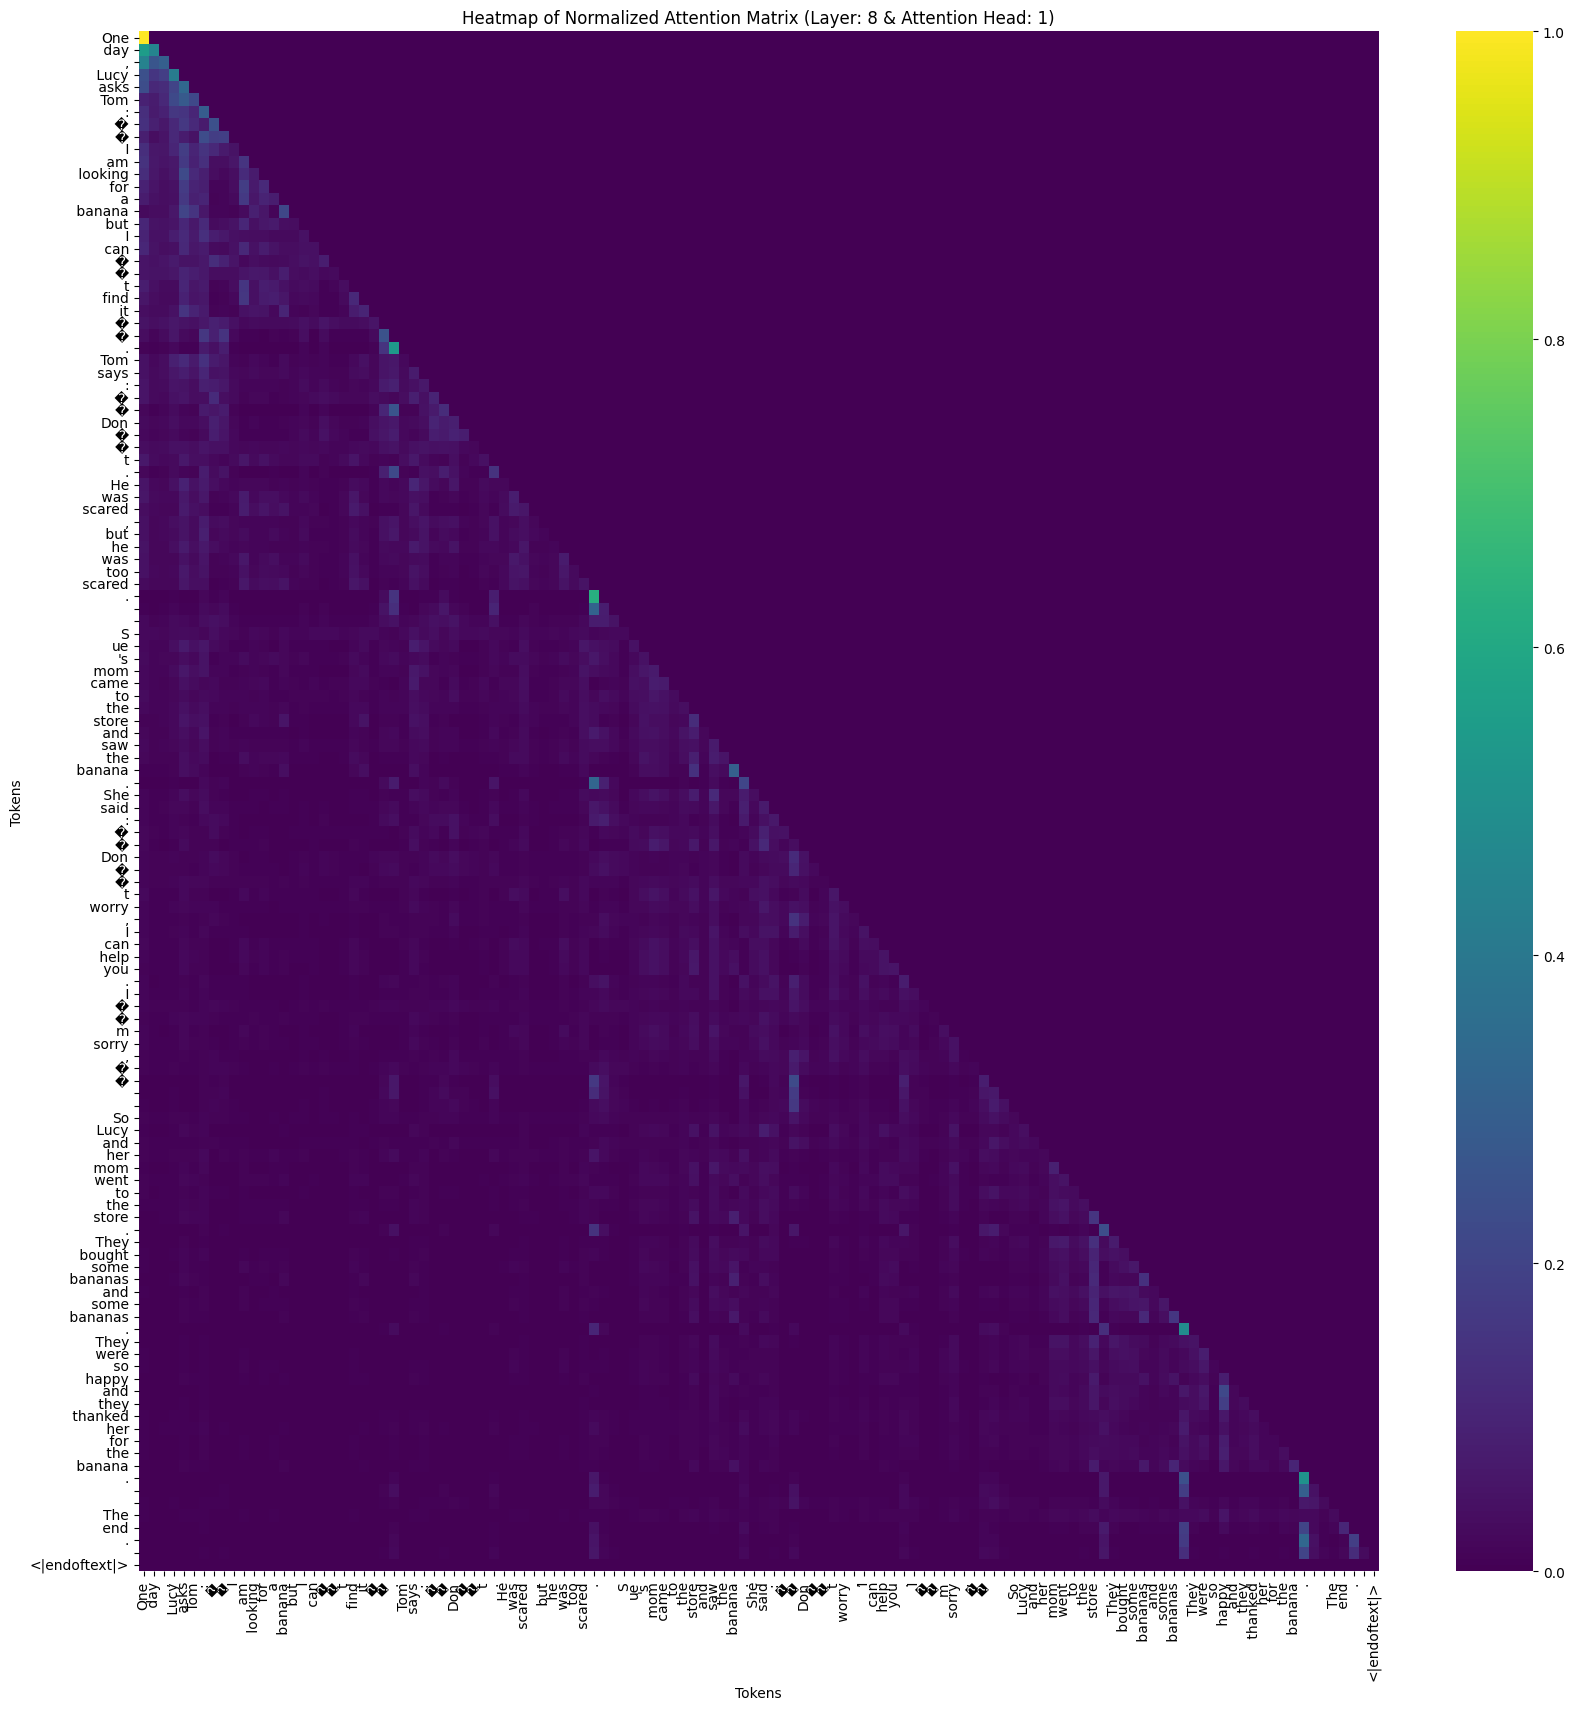

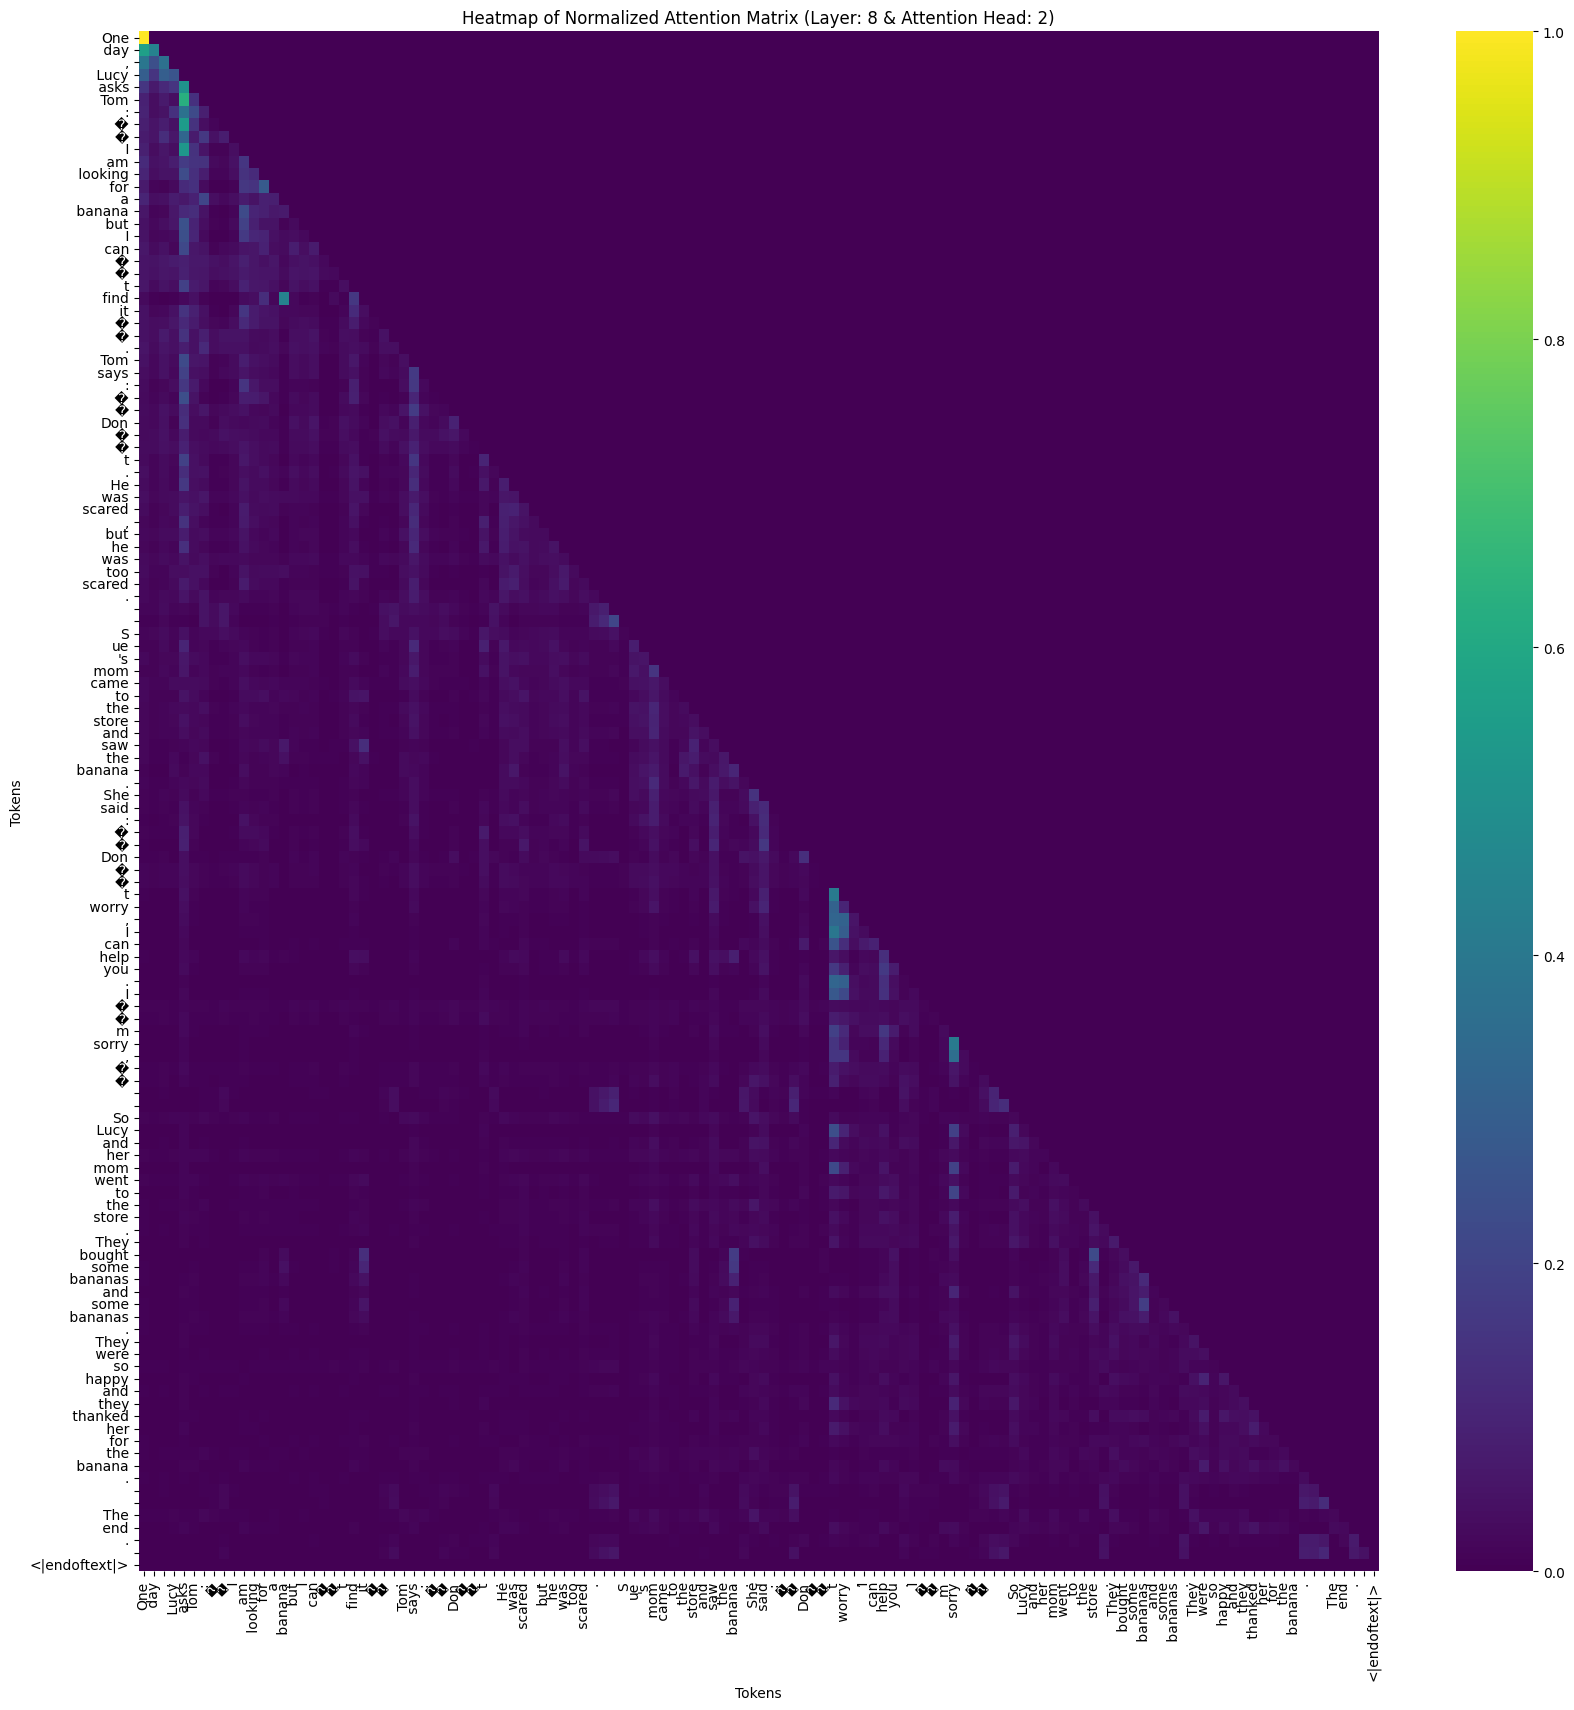

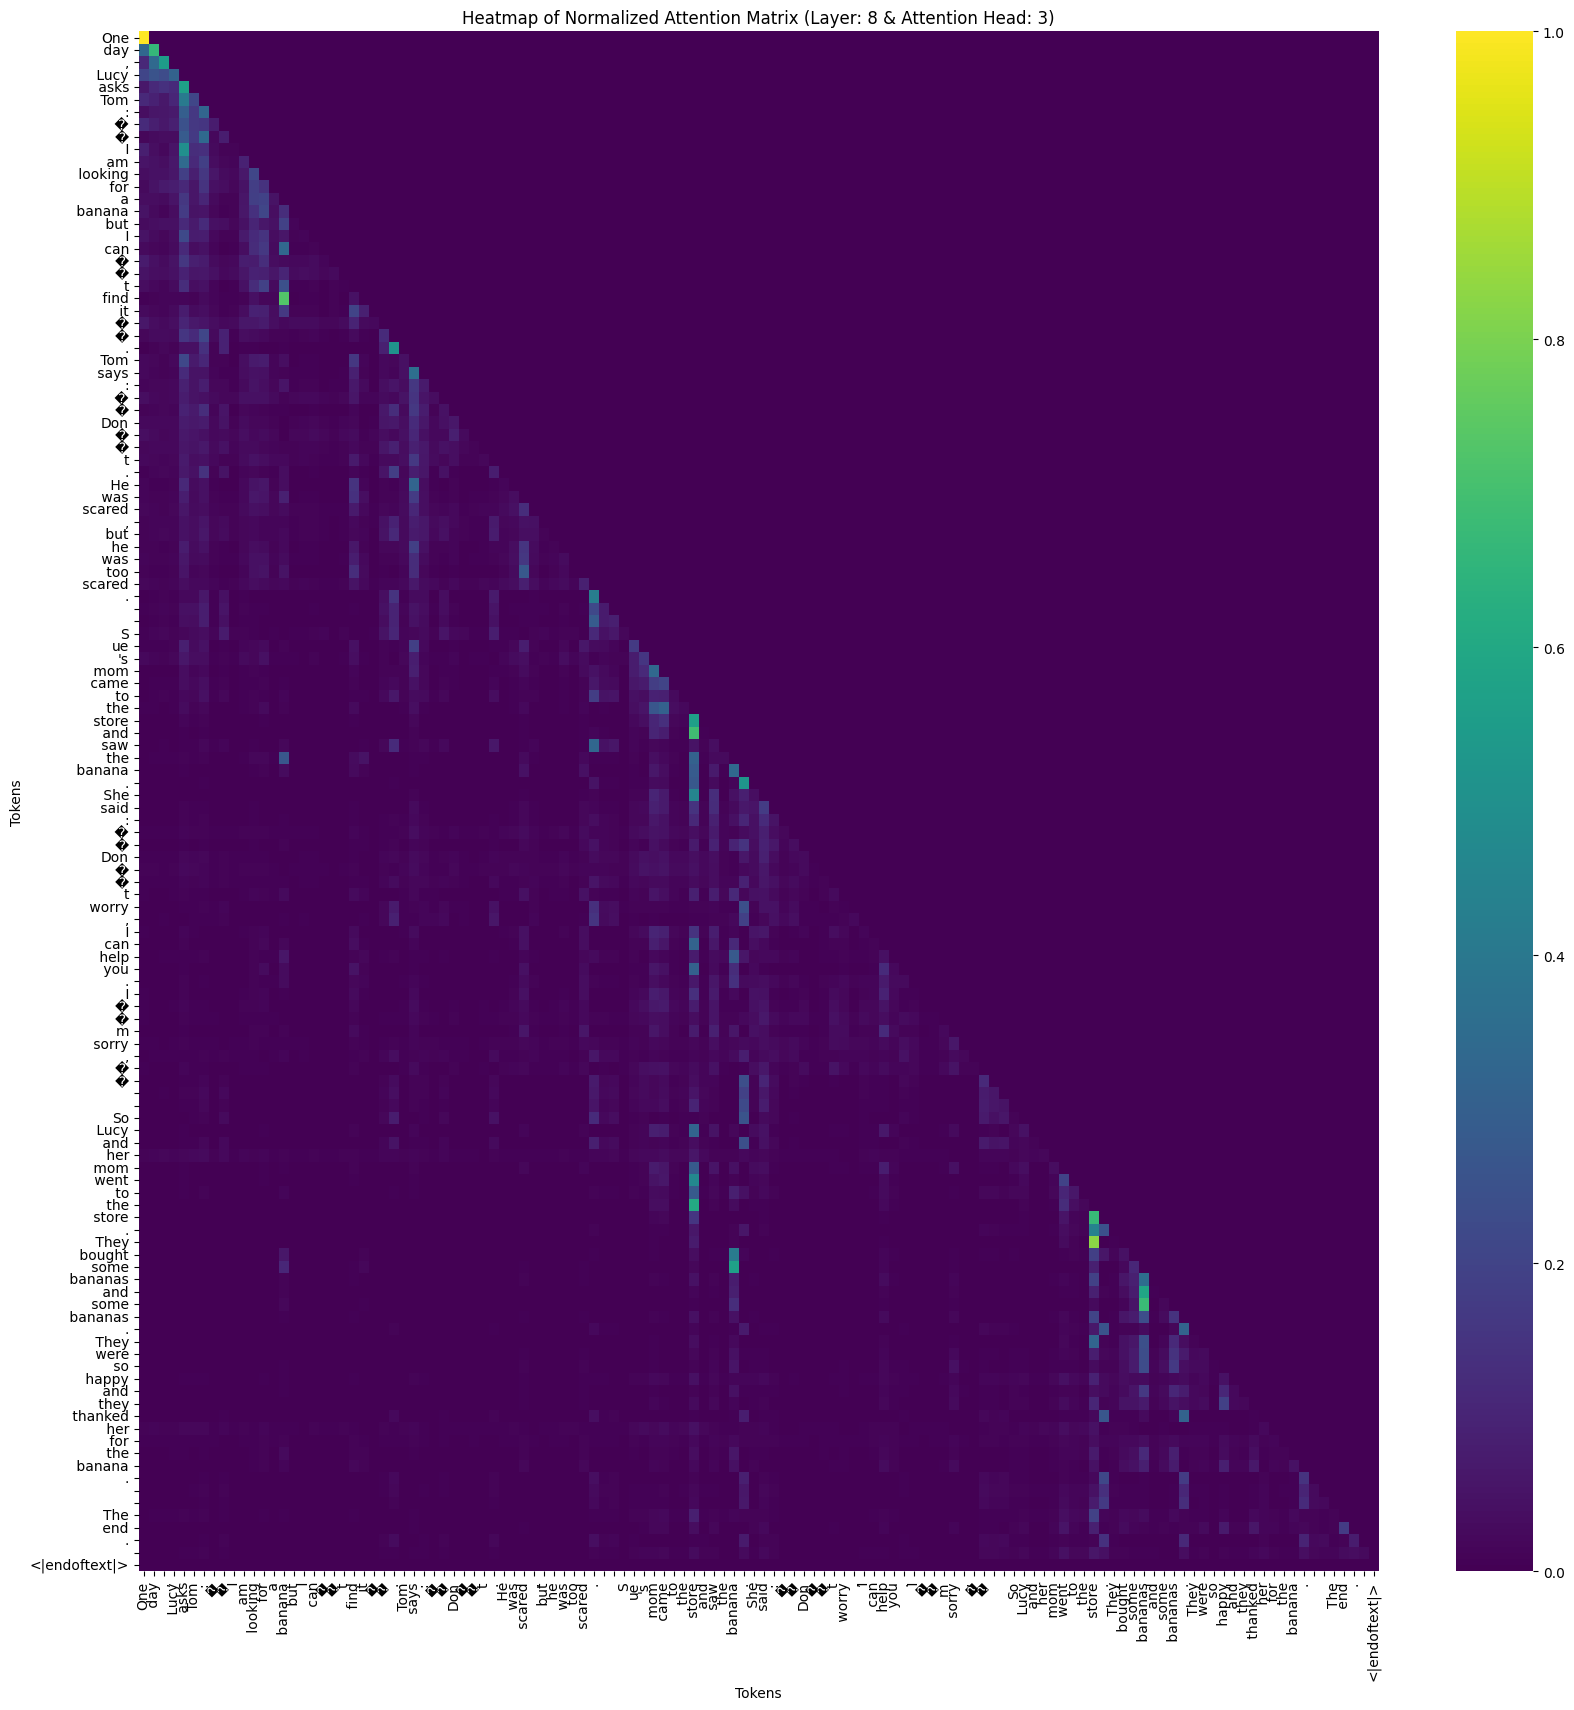

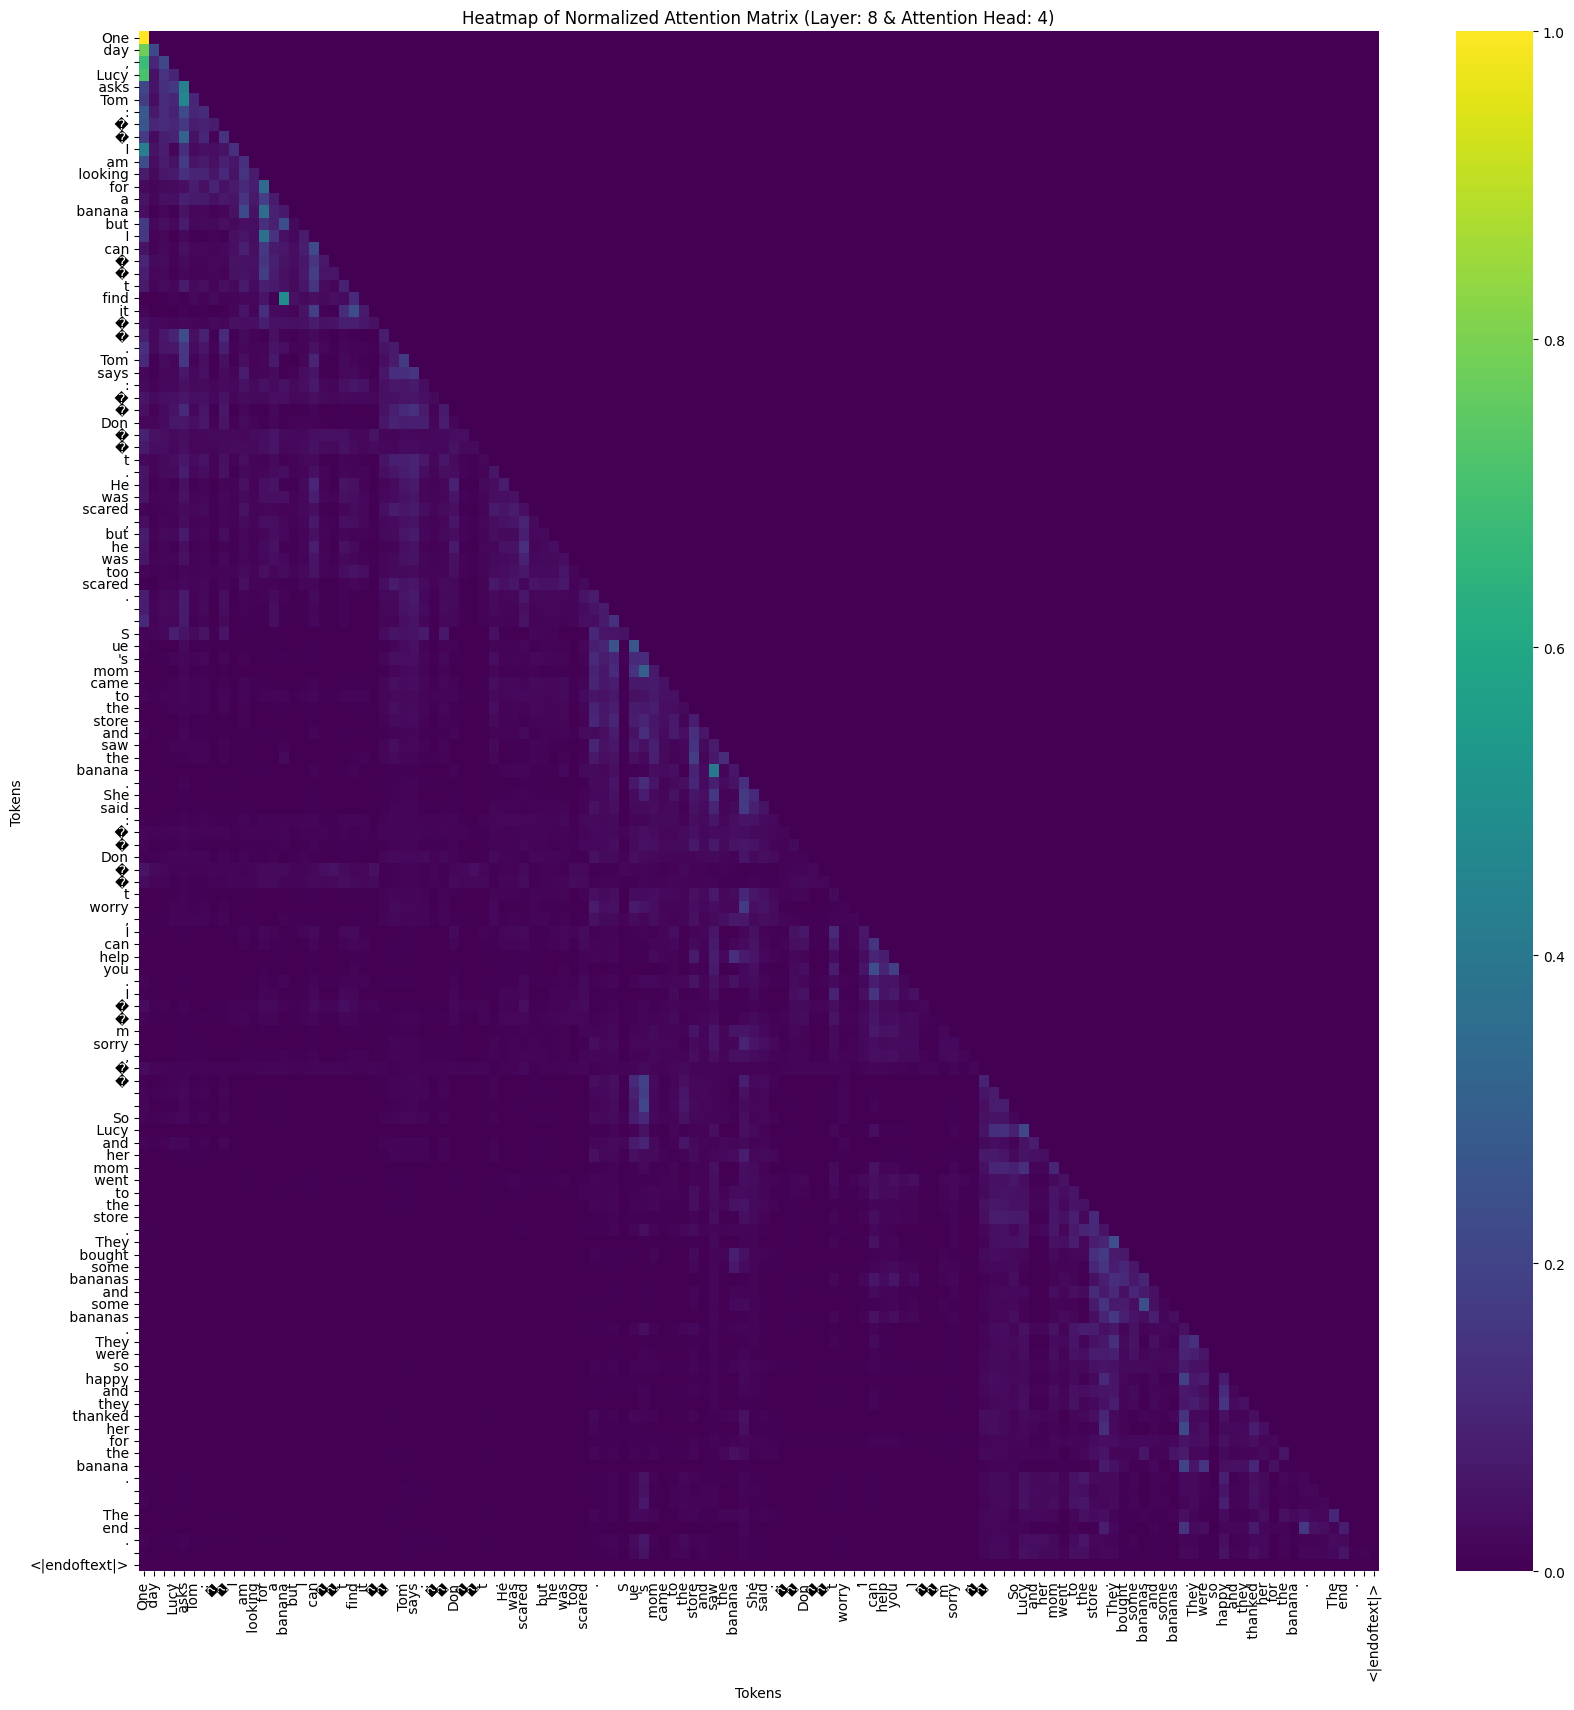

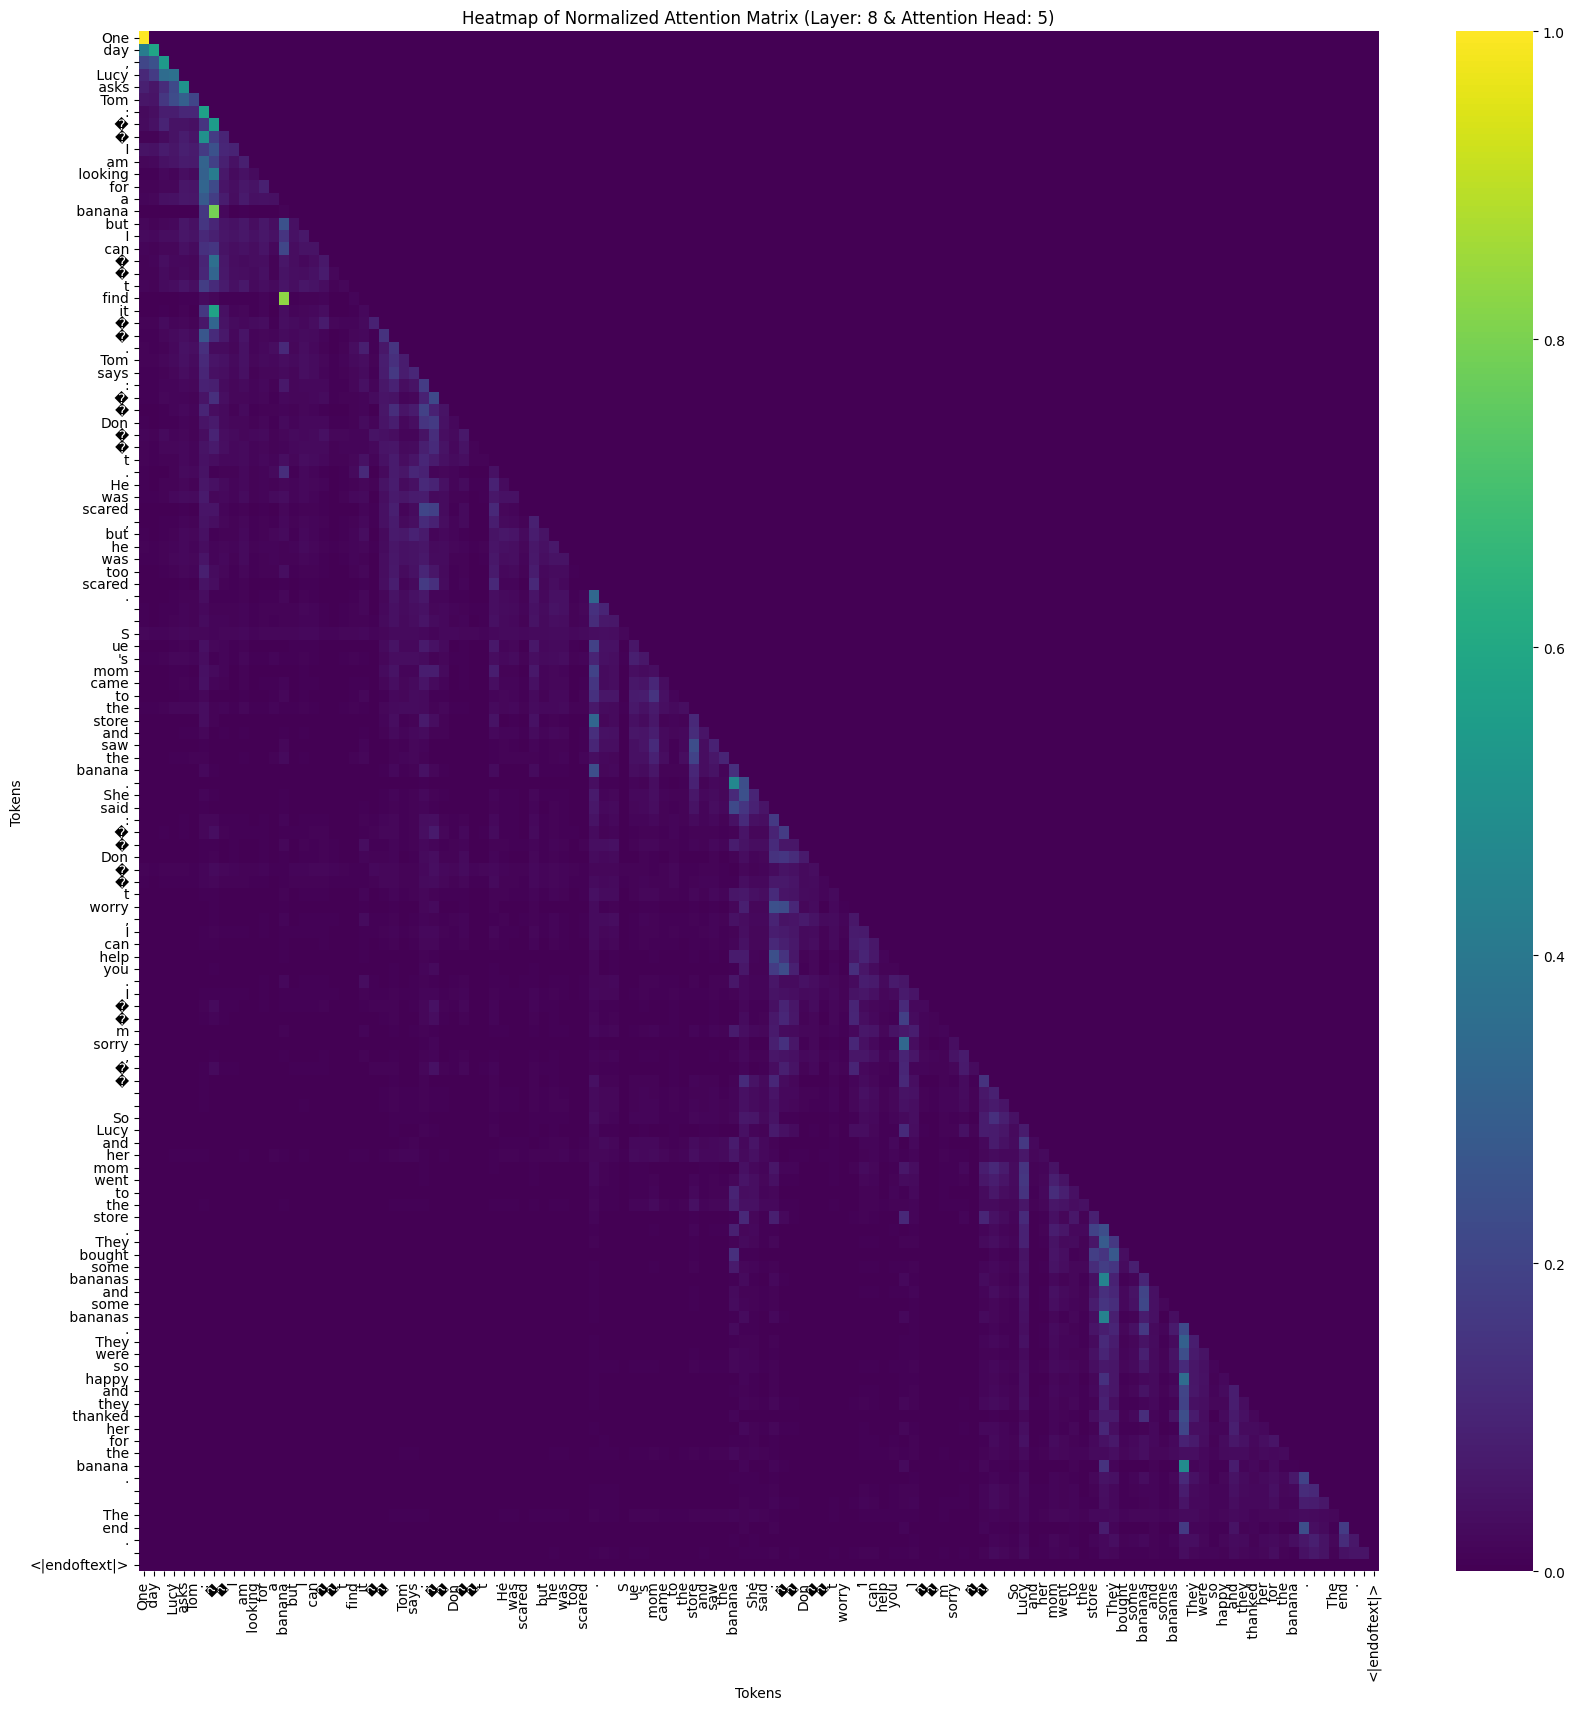

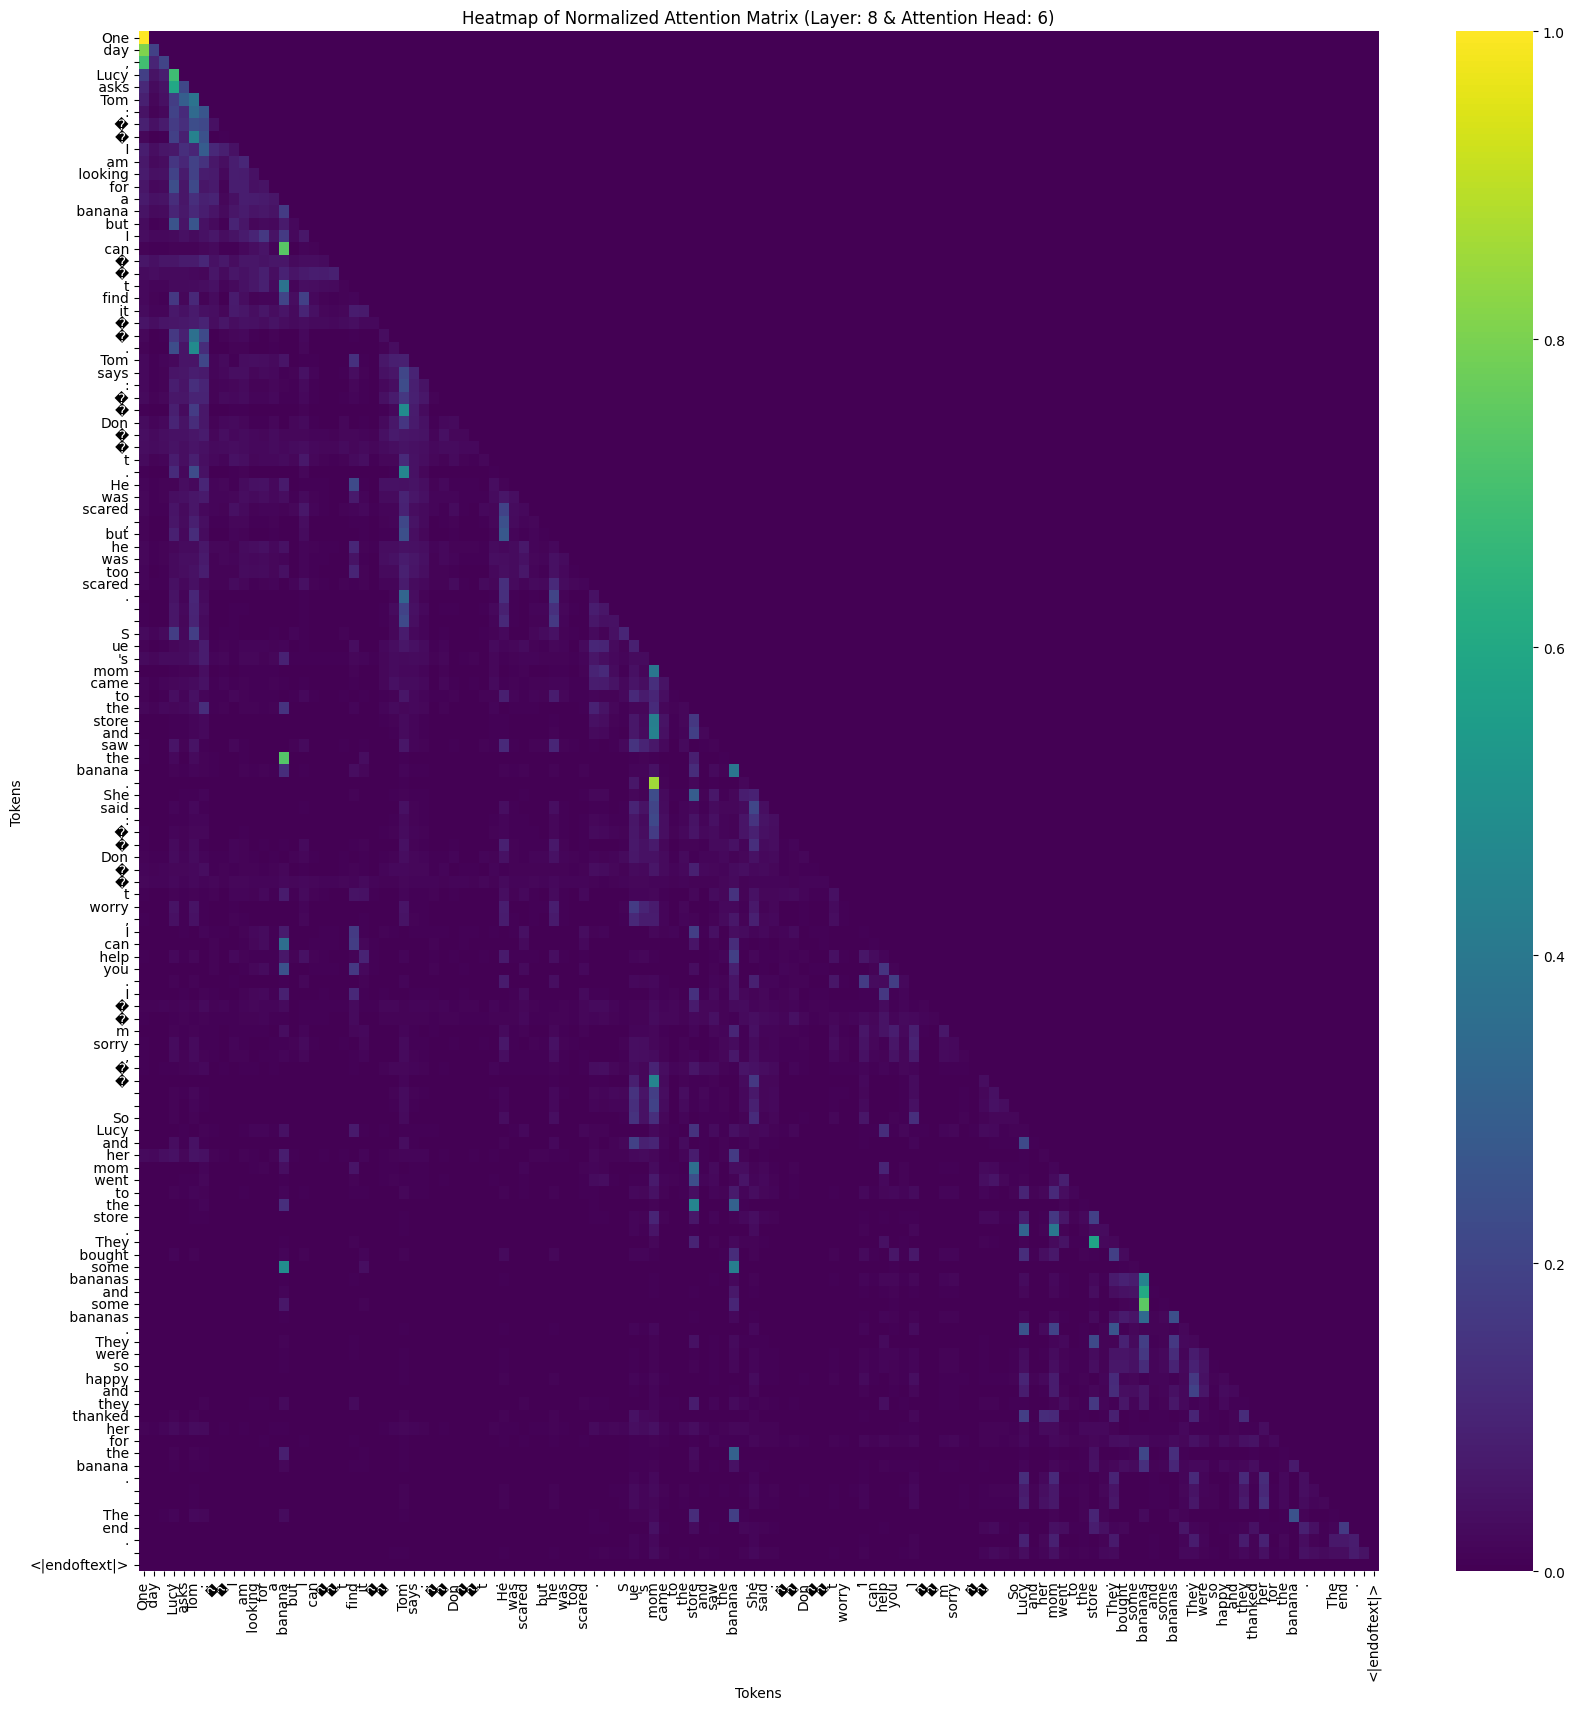

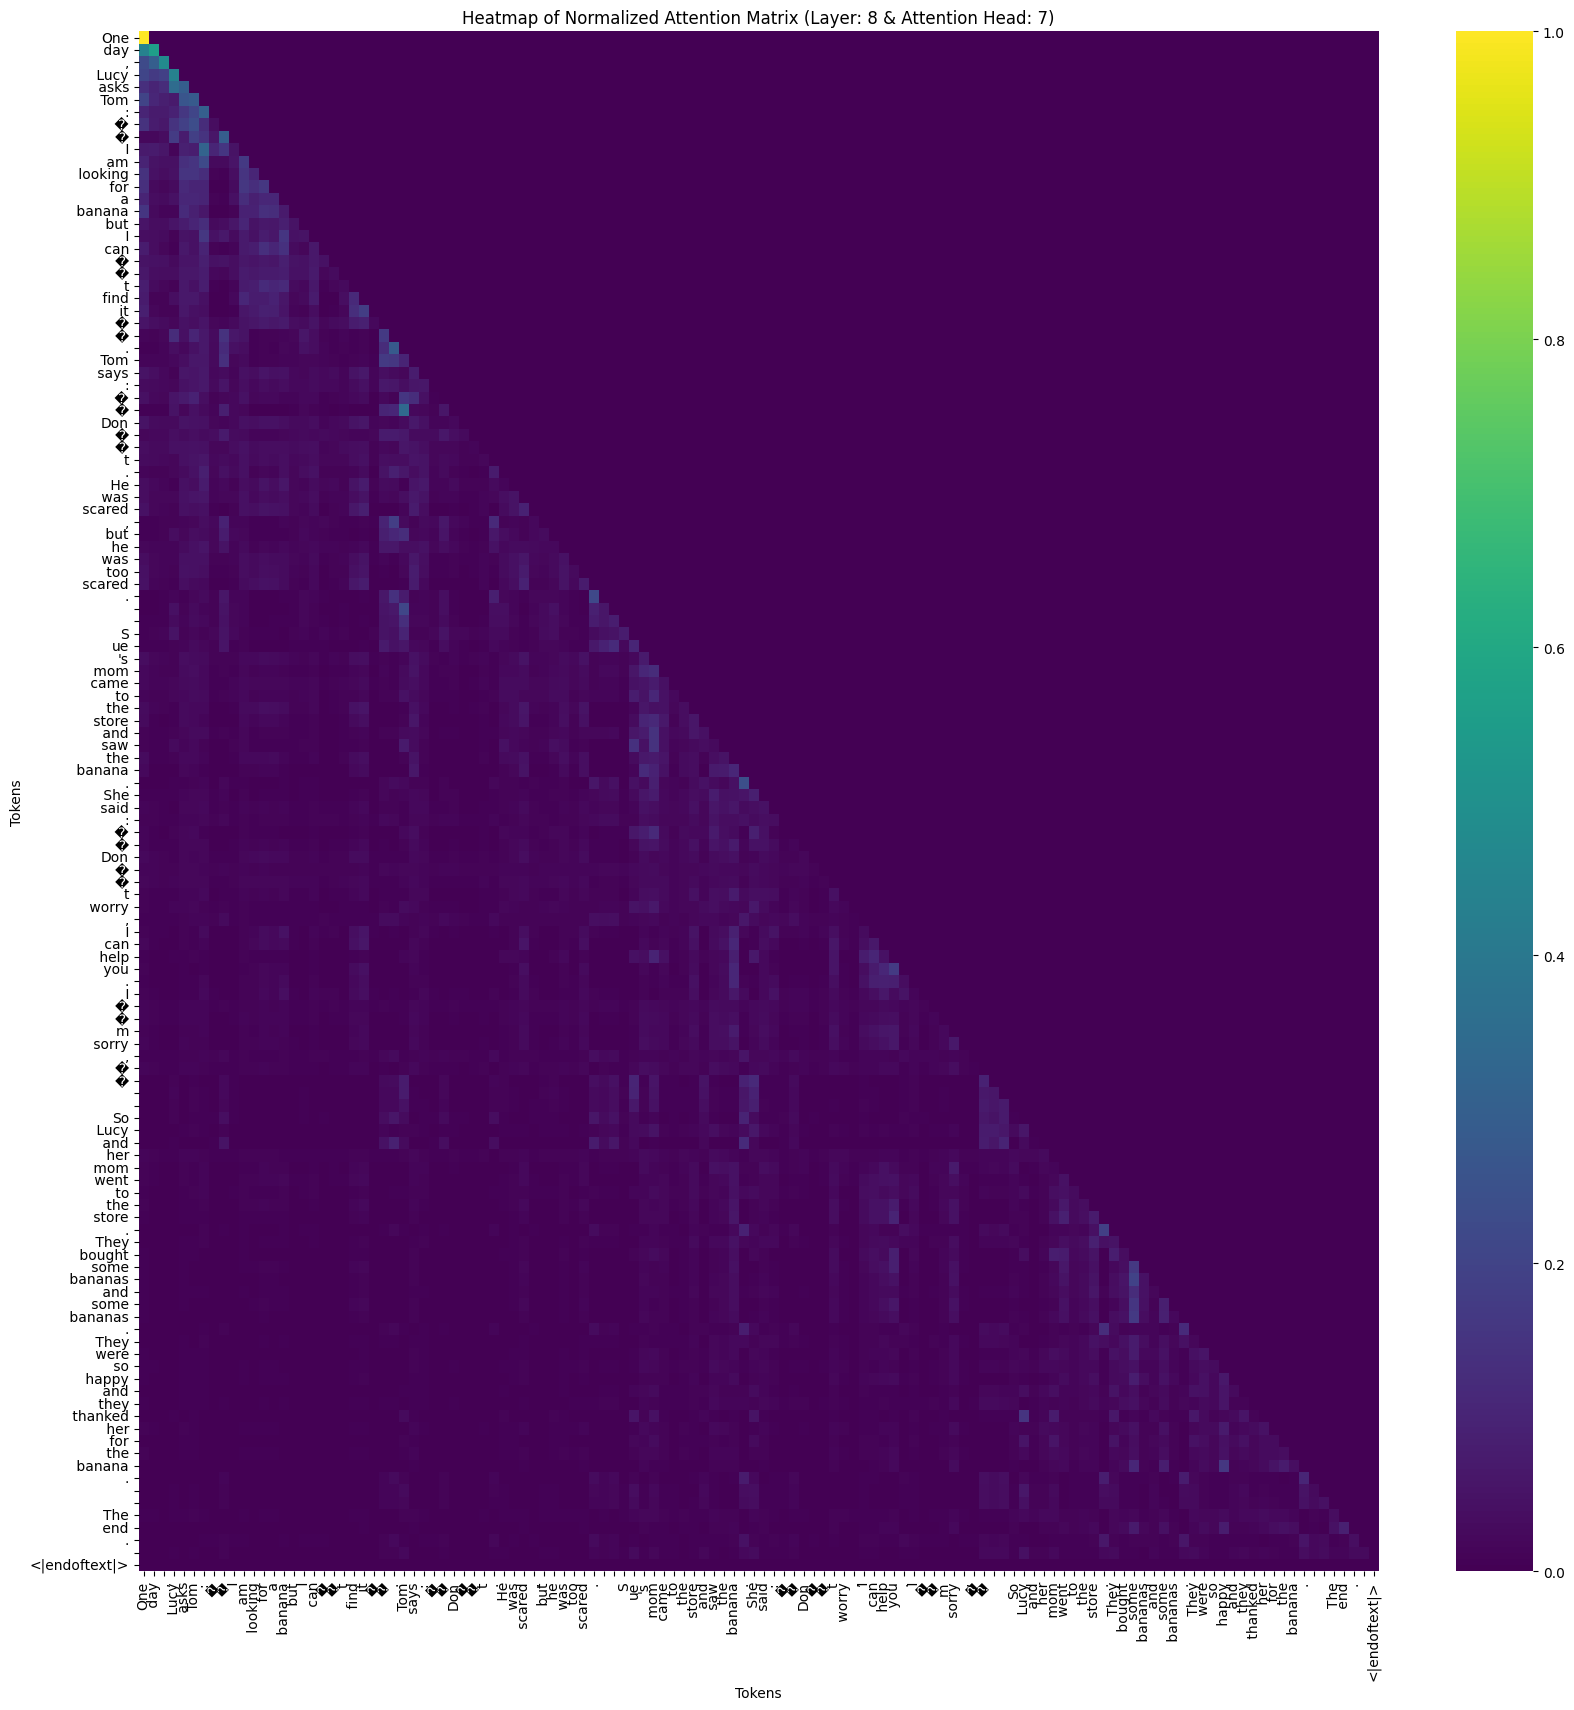

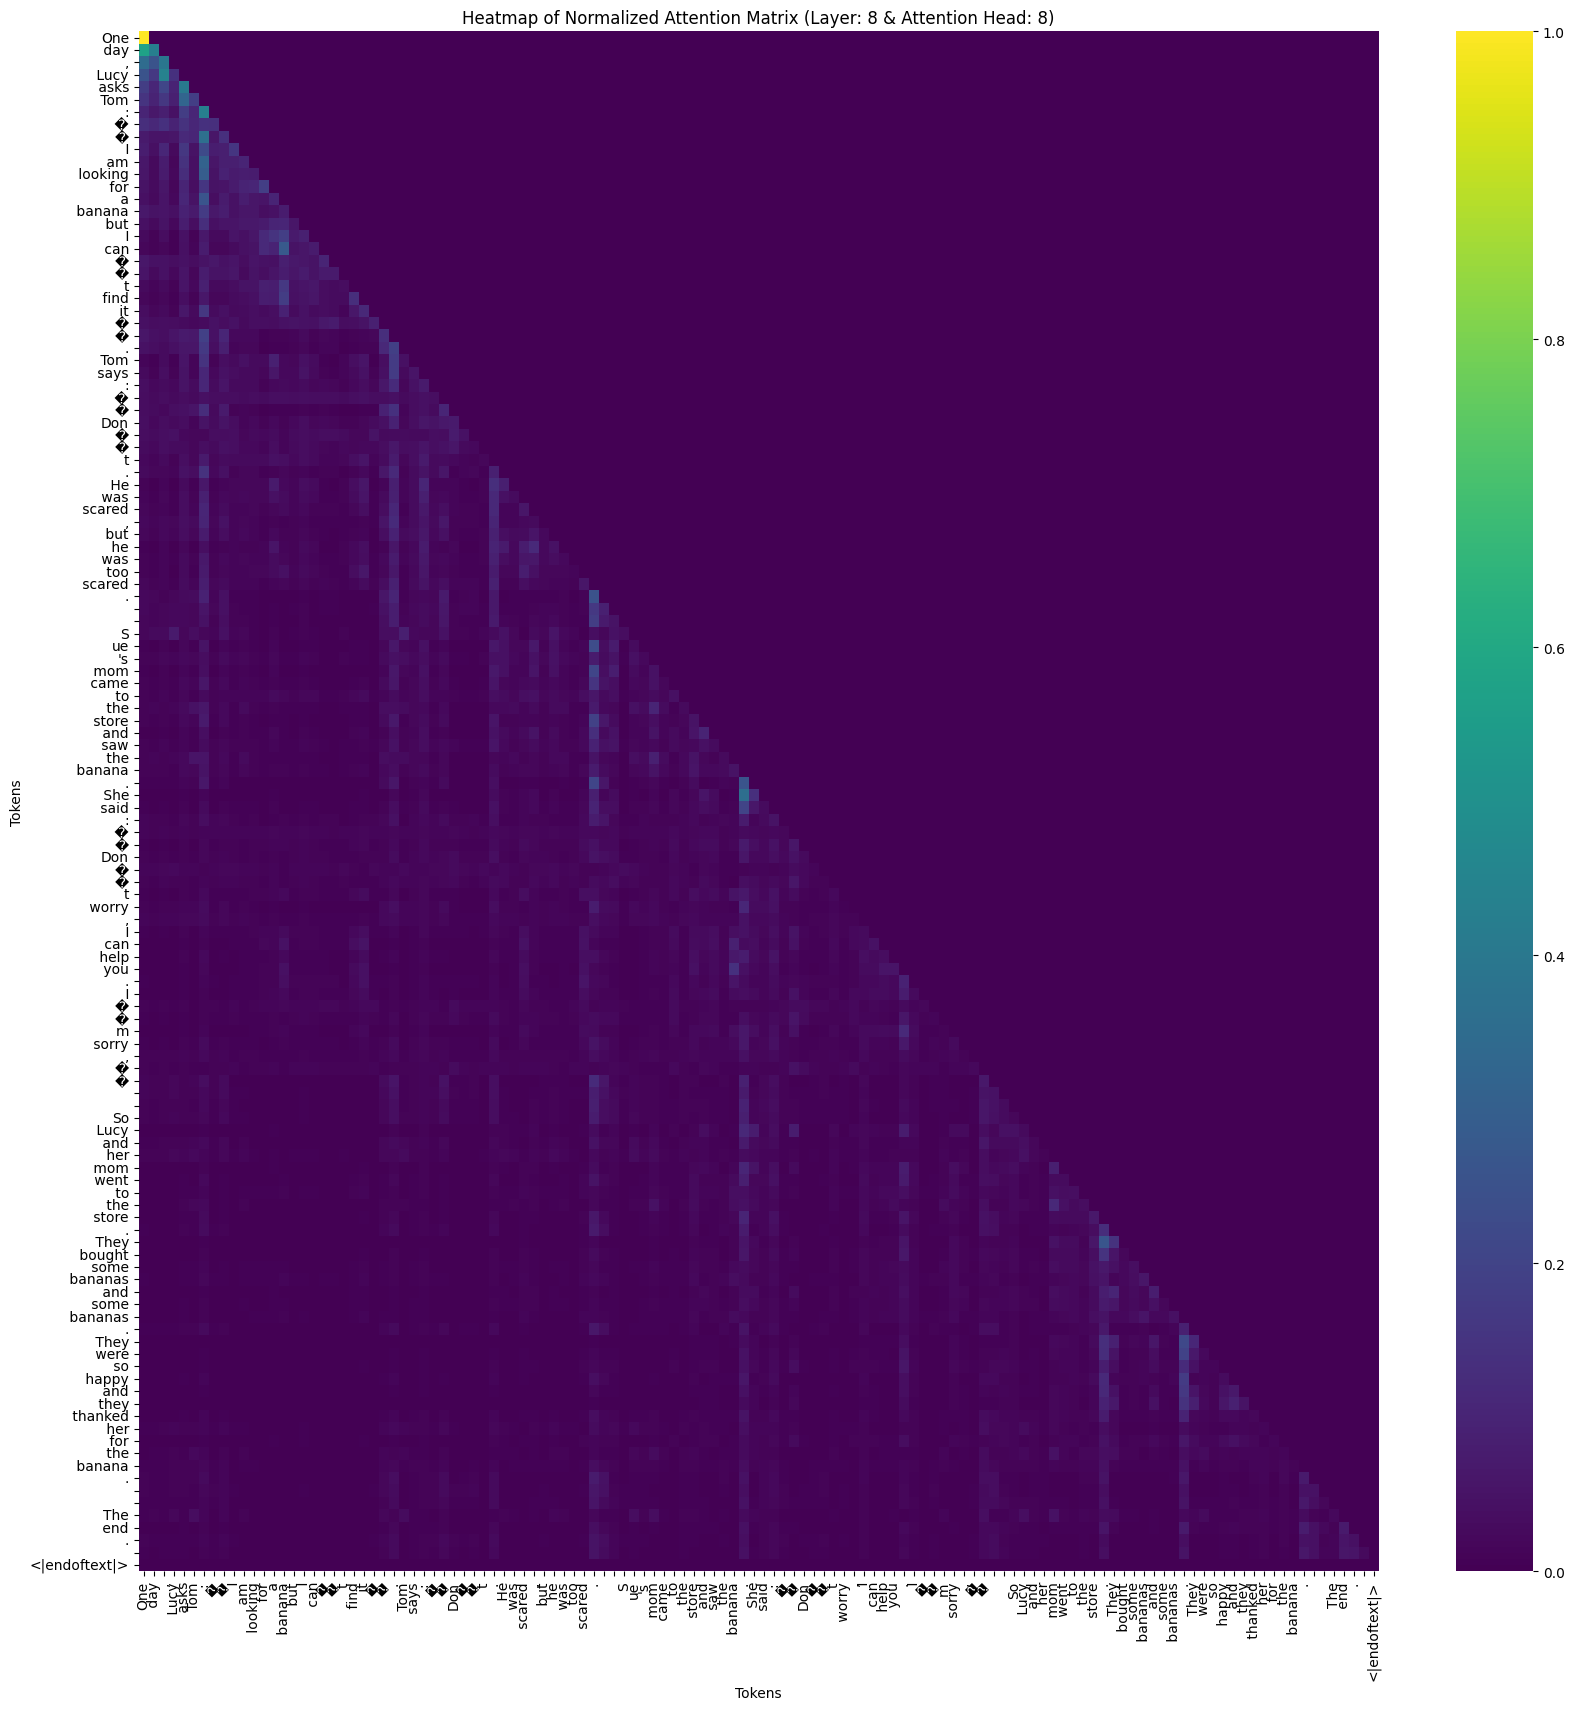

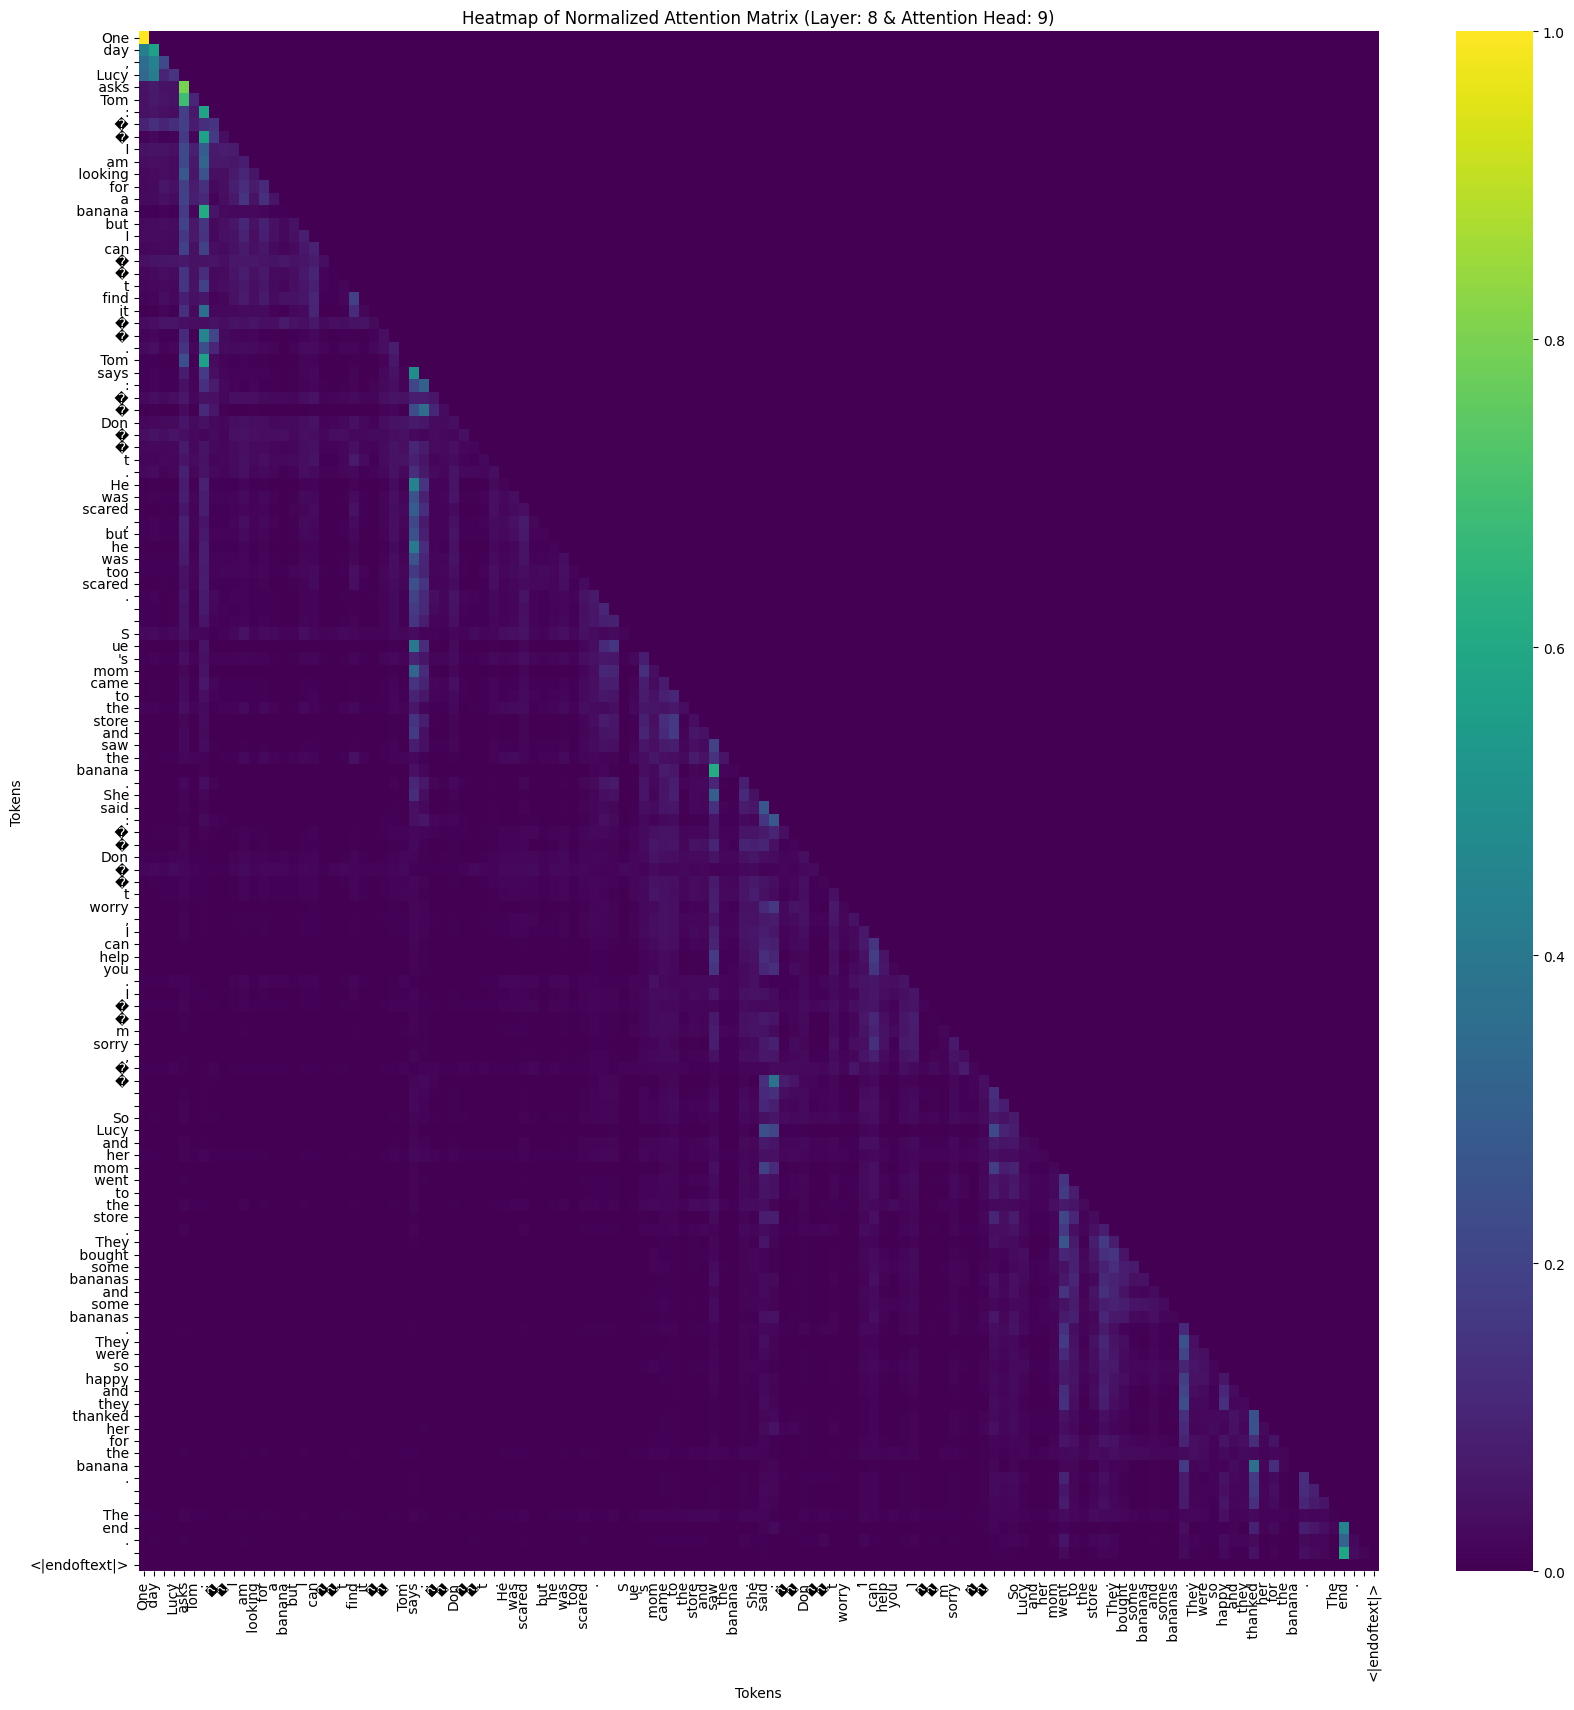

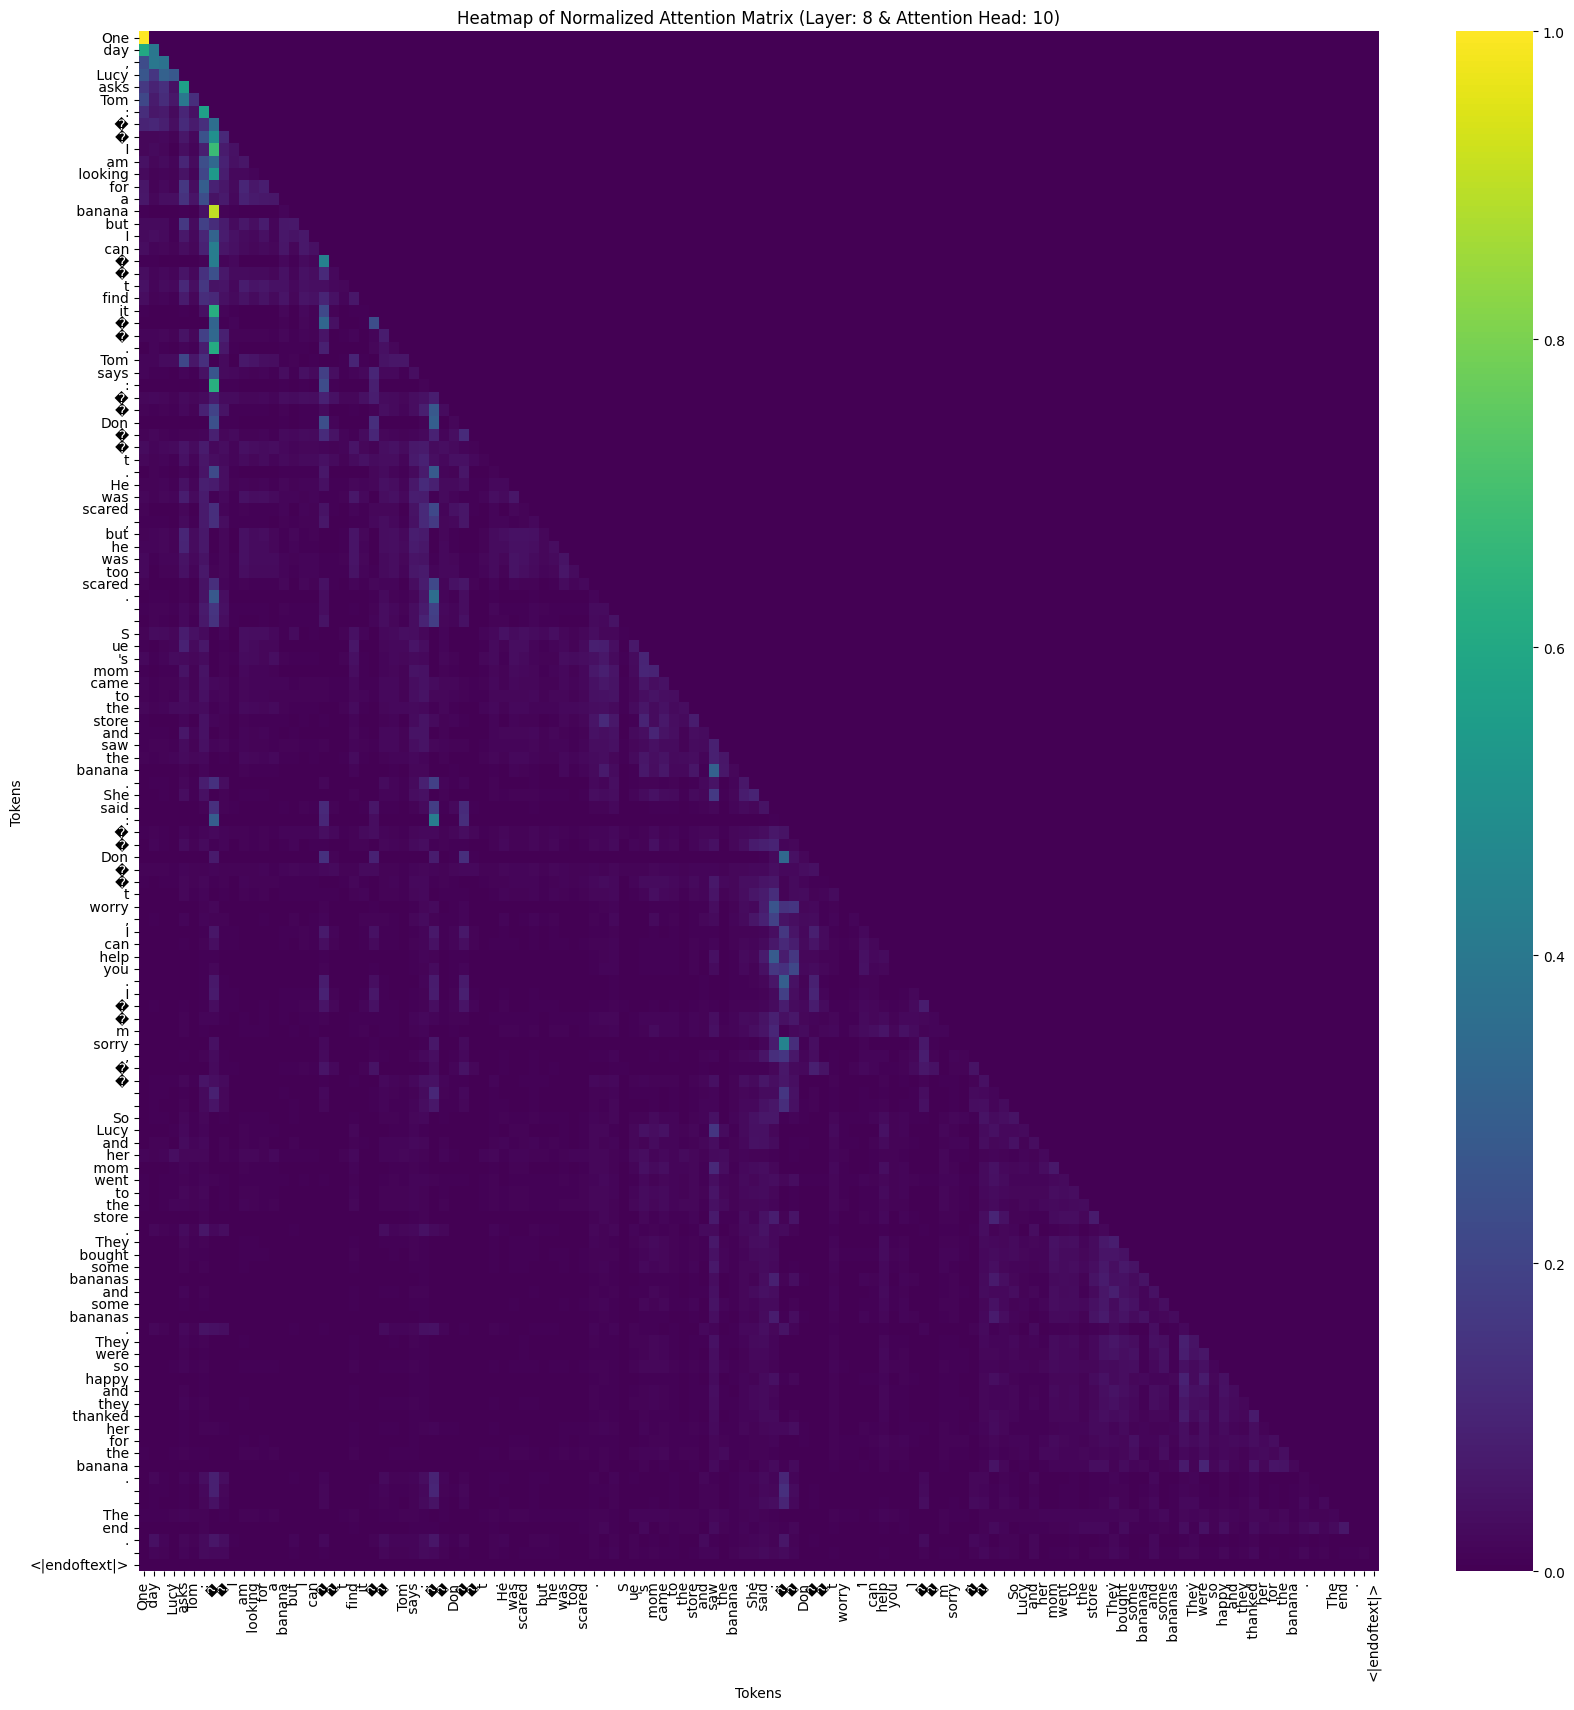

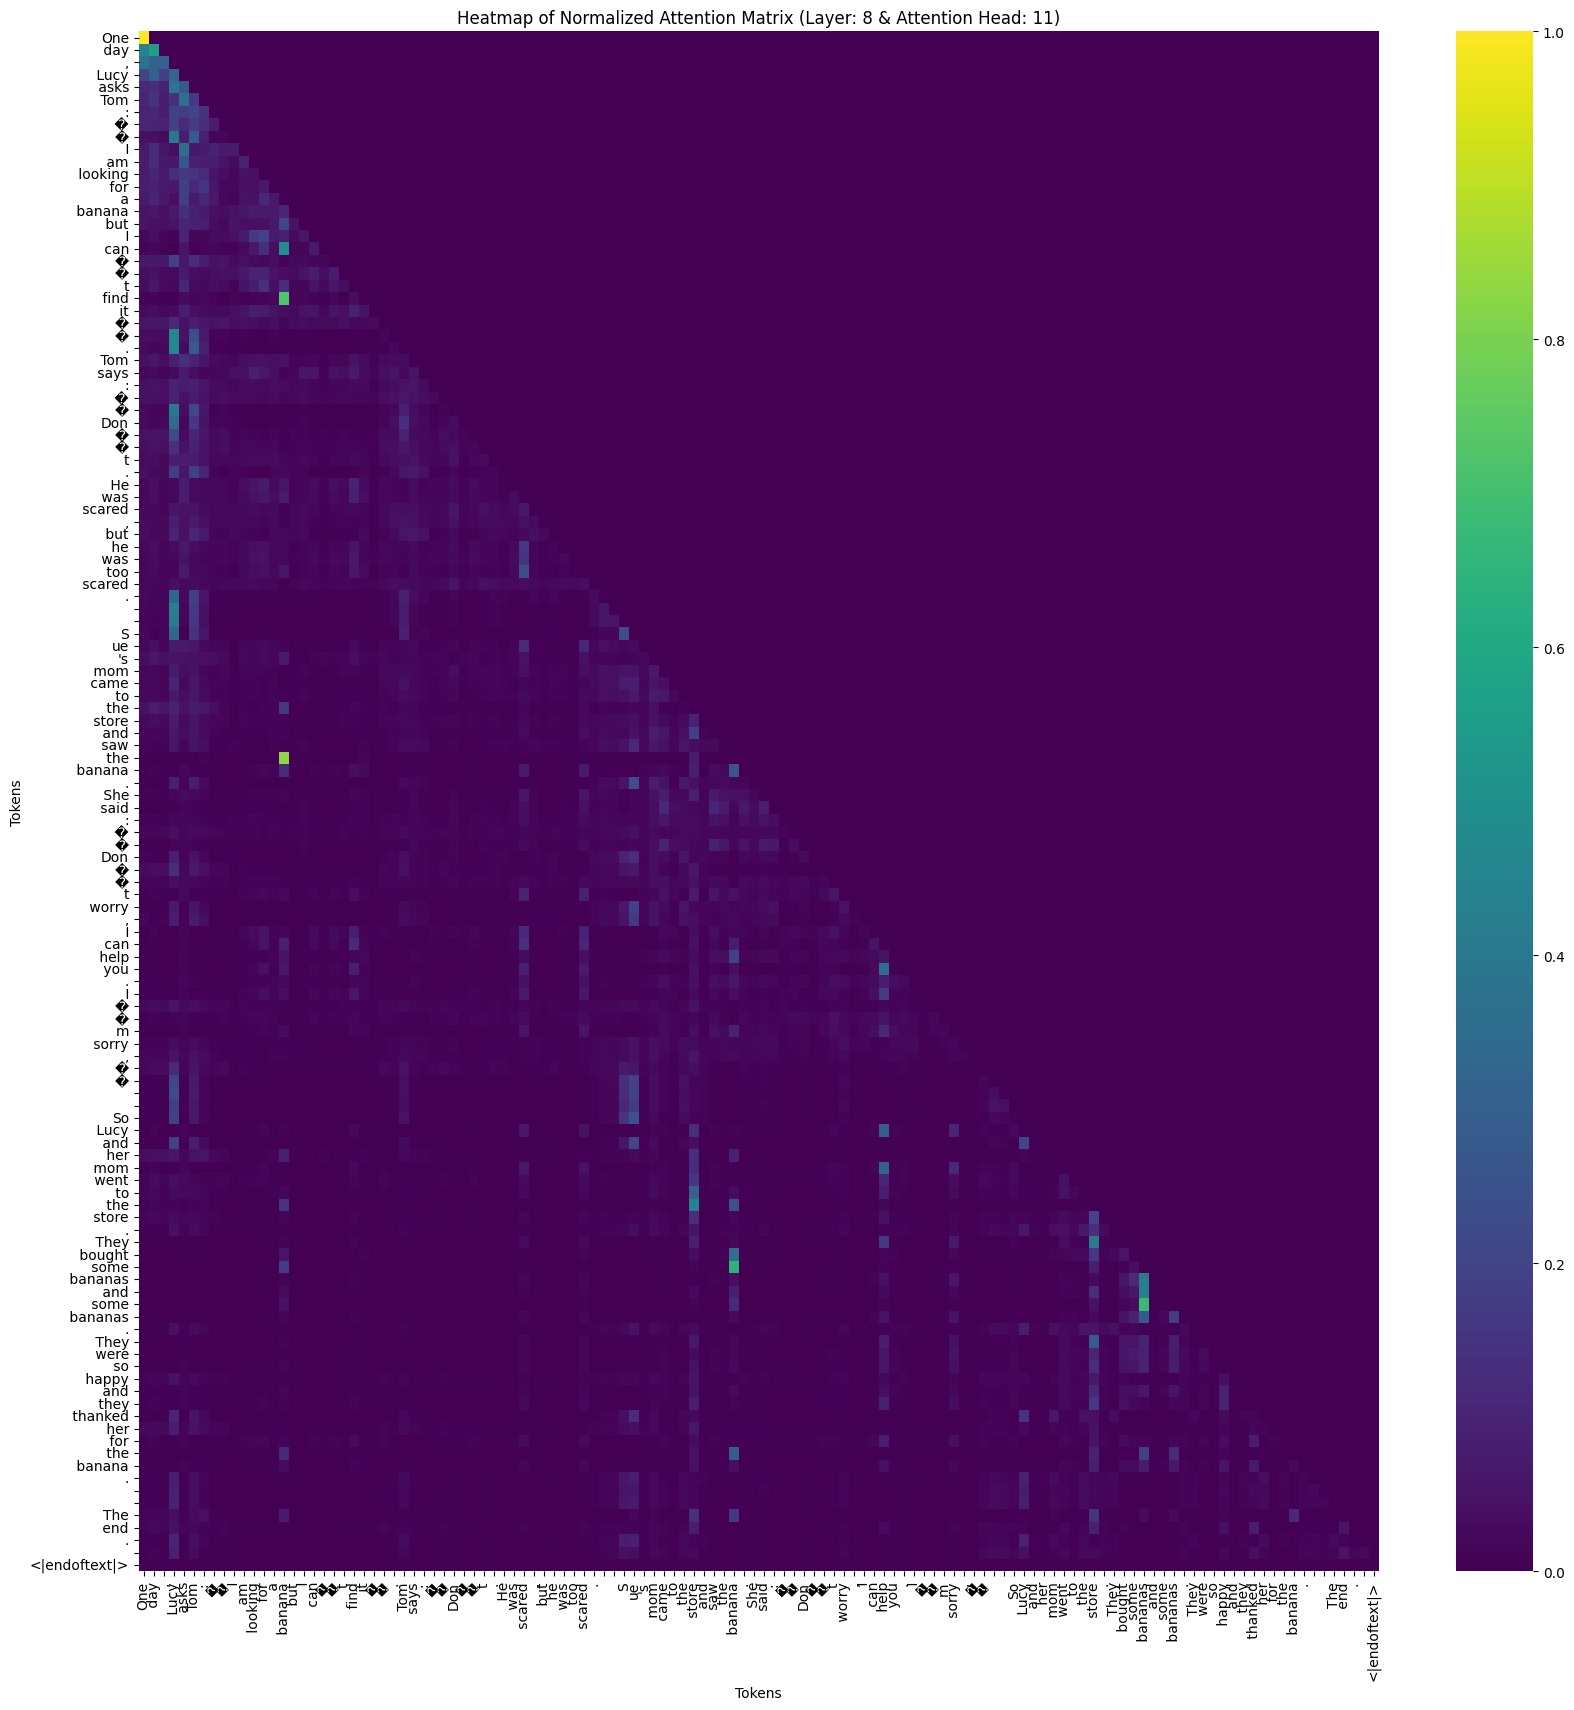

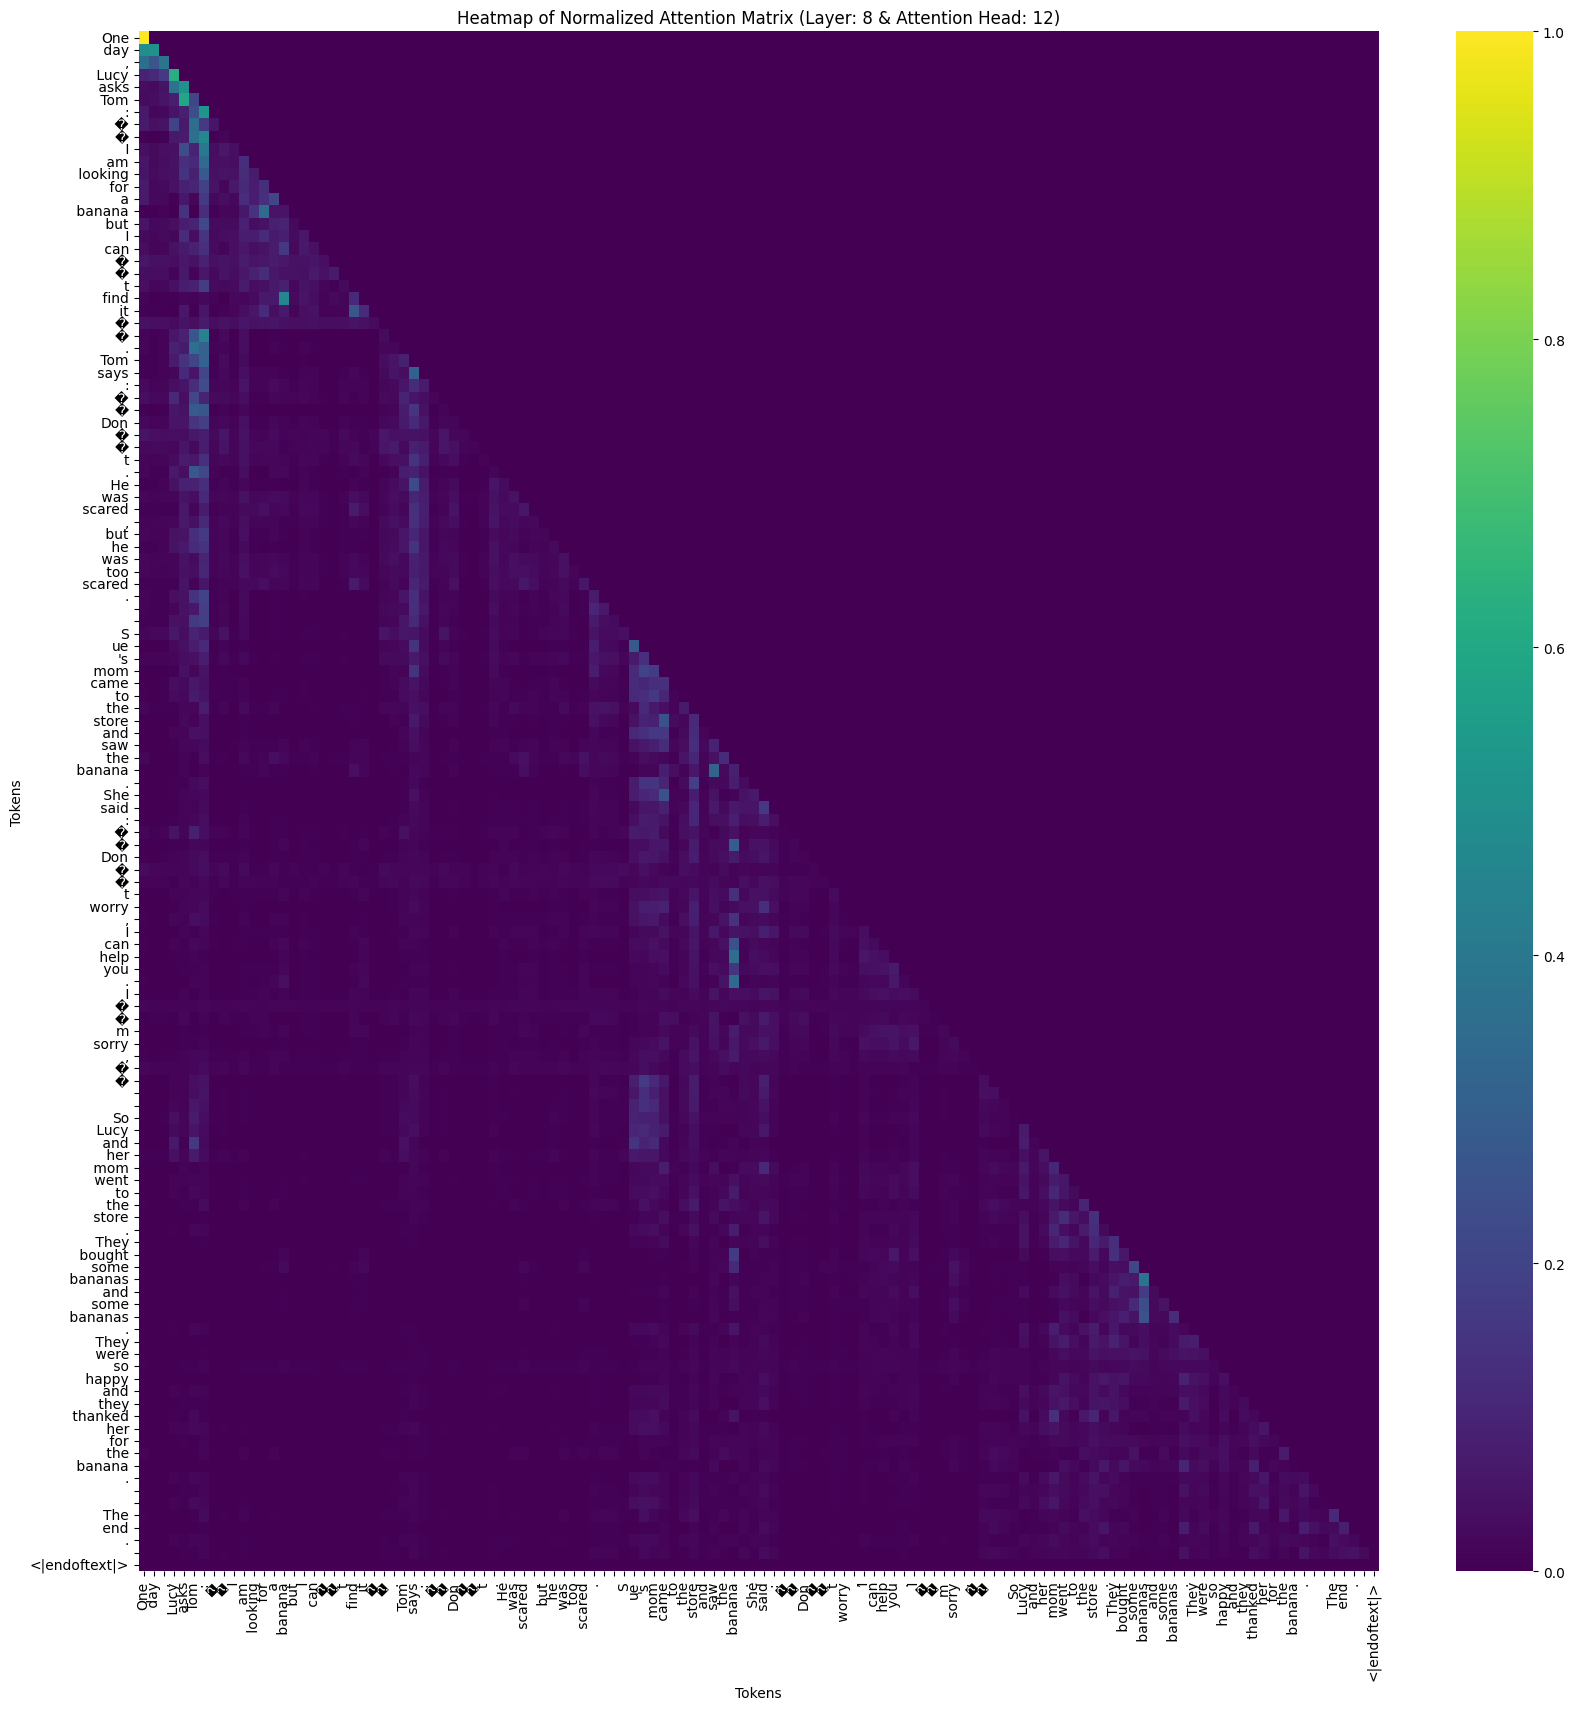

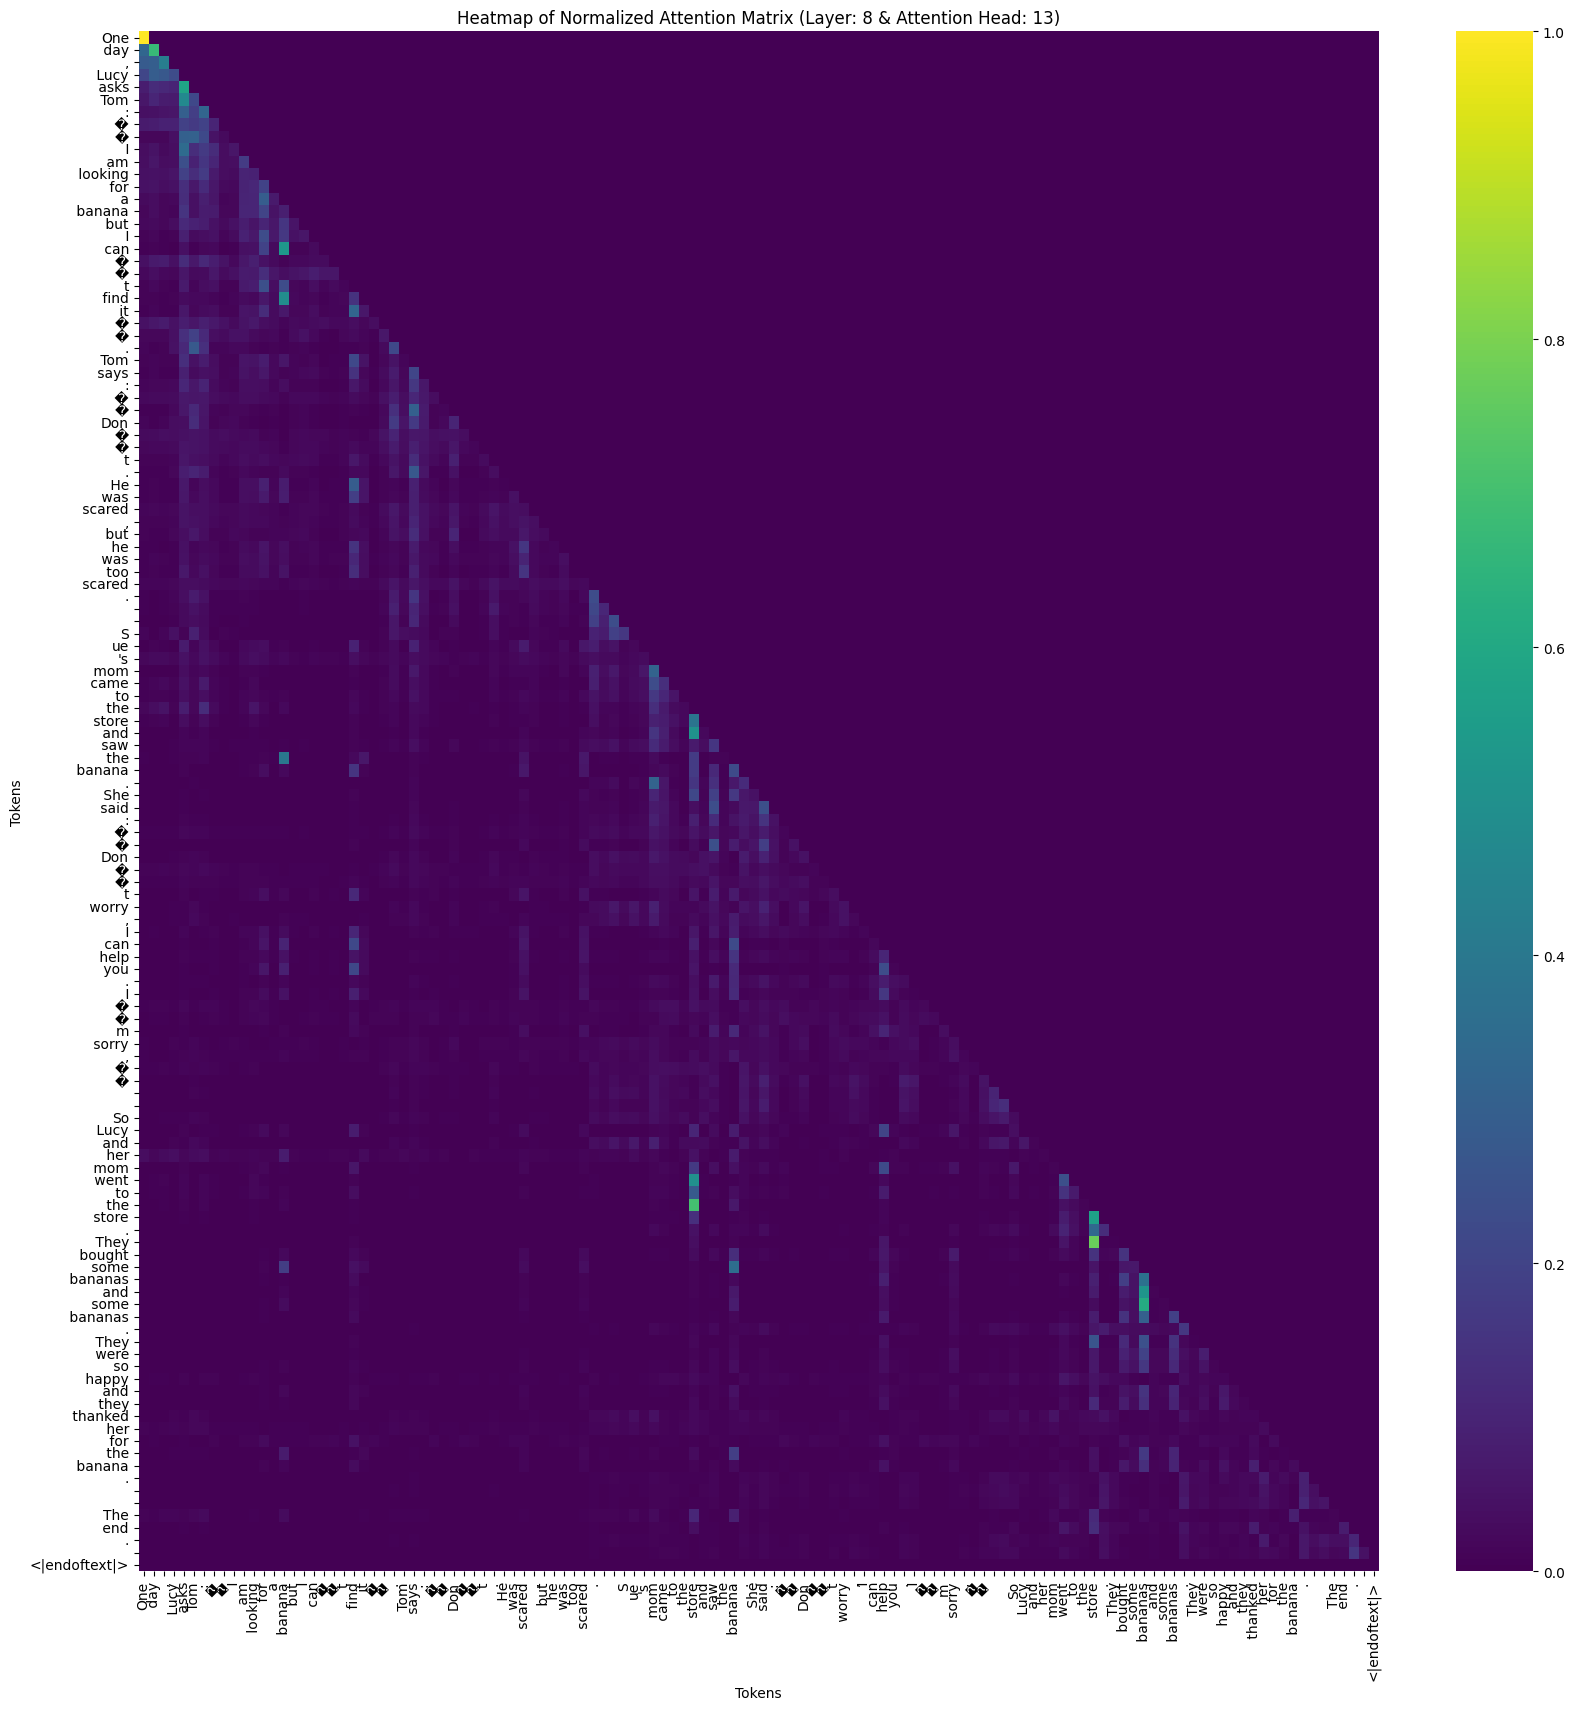

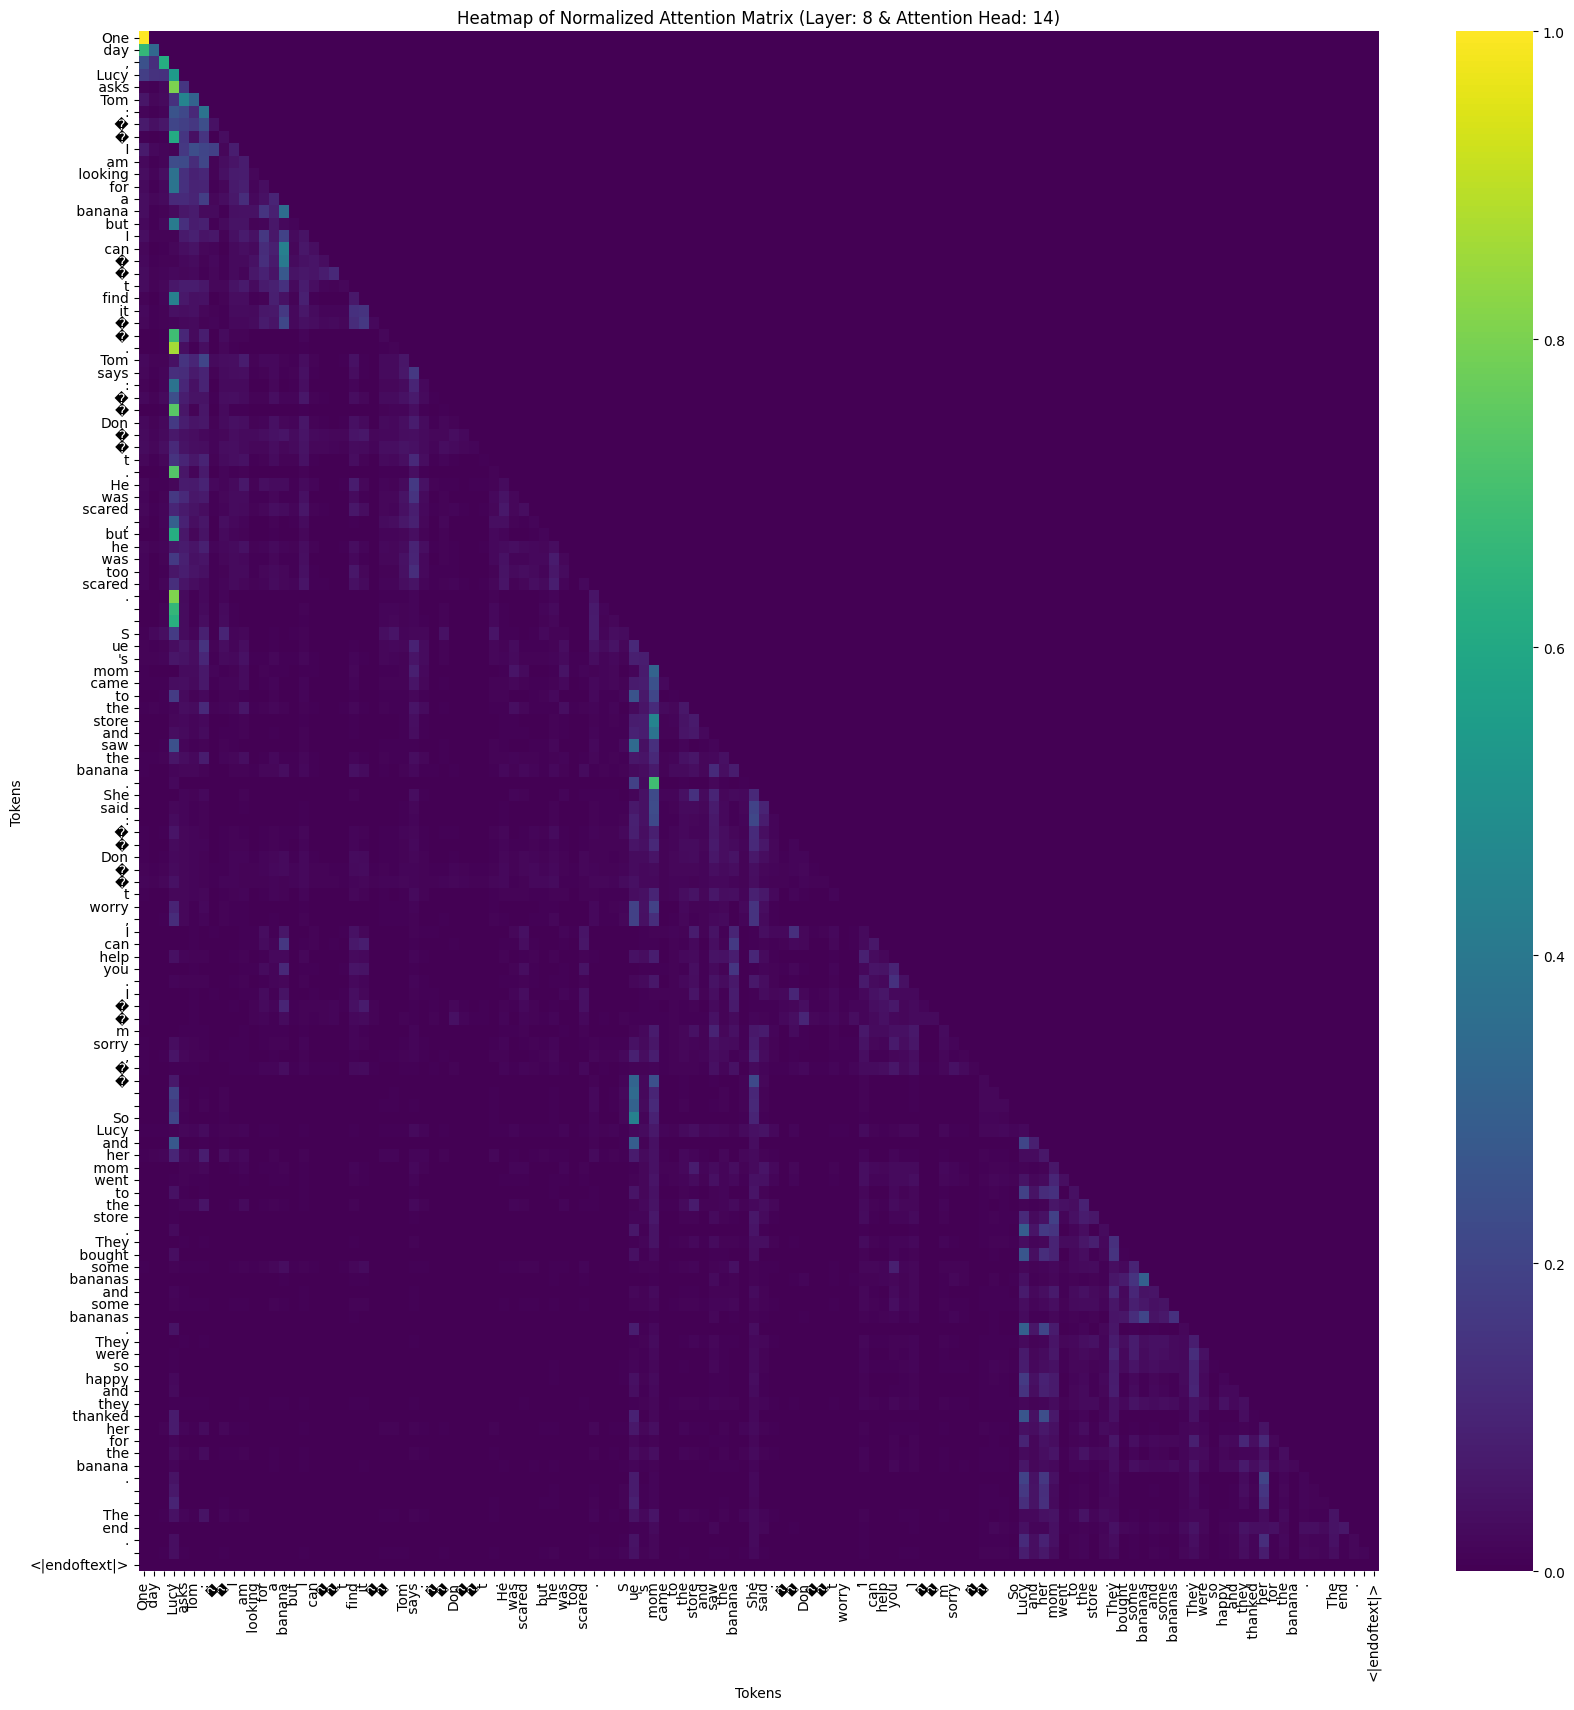

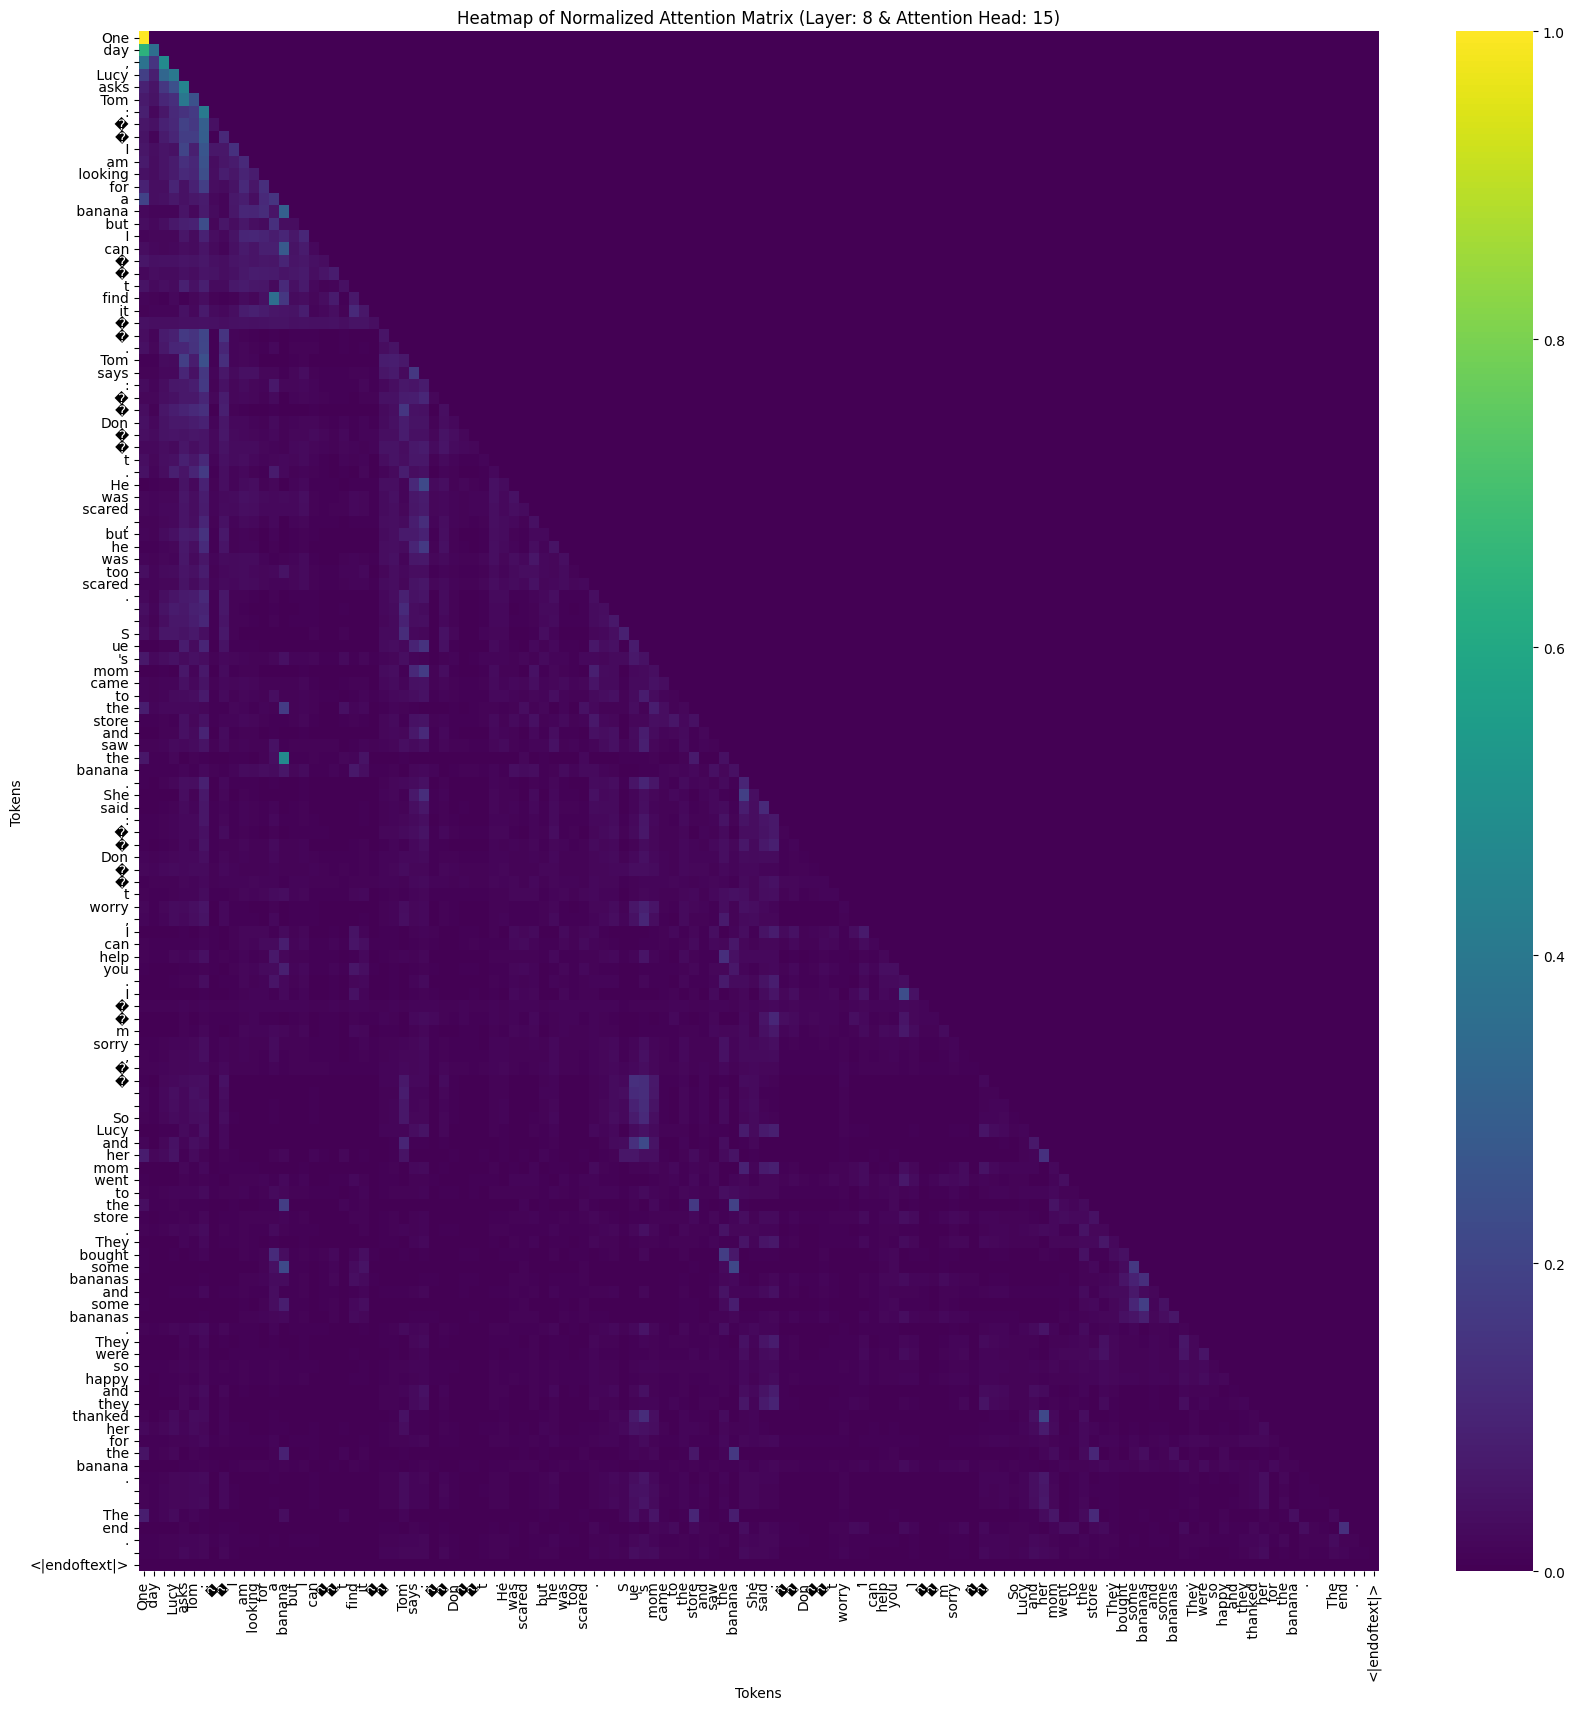

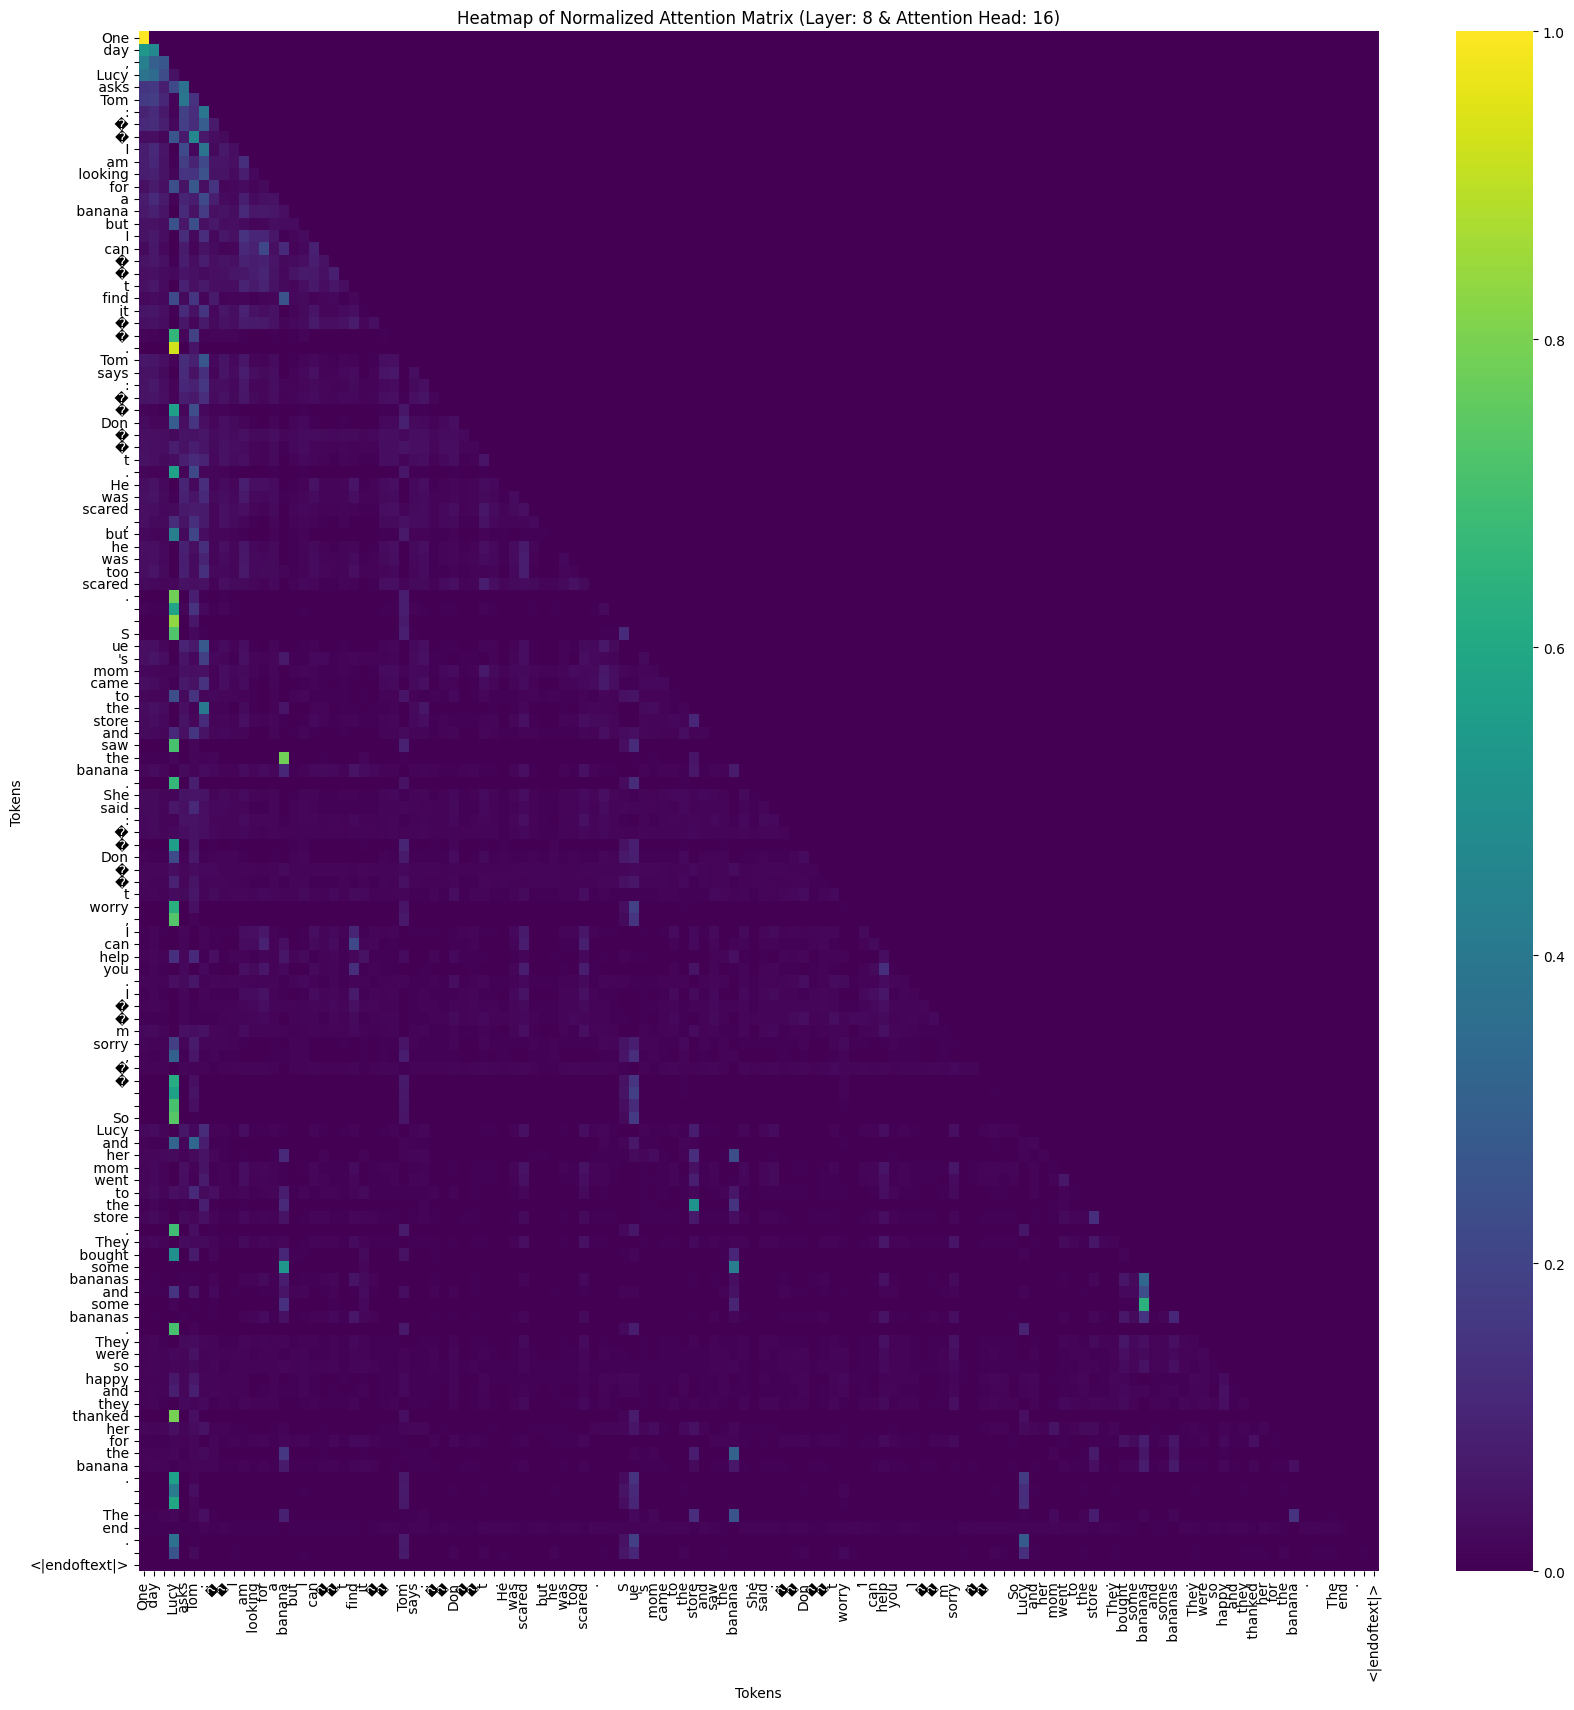

In [ ]:
#full_attention_matrix for each head in layer 8 of transformer
for head in range(num_heads):
  full_attention_matrix = torch.zeros(attn_len, attn_len)
  row=0
  for attn in attentions:
      # Extract the attention weights for the 8th layer
      #1x16x(36or1)x(current length)
      layer_attention = attn[layer]
      for each_token in layer_attention[0][head]:
        for k,value in enumerate(each_token):
          full_attention_matrix[row][k] += value
        row+=1

  normalized_attention_matrix = full_attention_matrix / full_attention_matrix.max()

  plt.figure(figsize=(20, 20))

  sns.heatmap(full_attention_matrix, cmap="viridis",xticklabels=decoded_tokens,yticklabels=decoded_tokens)
  plt.title(f"Heatmap of Normalized Attention Matrix (Layer: {layer+1} & Attention Head: {head+1})")
  plt.xlabel("Tokens")
  plt.ylabel("Tokens")
  plt.show()

### Comparison with the Authors' Report
1. Self-Attention: The heatmaps prominently show self-attention, evident from
the bright squares along the diagonal of the matrices. This pattern aligns with the authors' findings, indicating that tokens heavily attend to themselves, a fundamental characteristic of the Transformer architecture. Here we see self attention for head 1 in layer 8 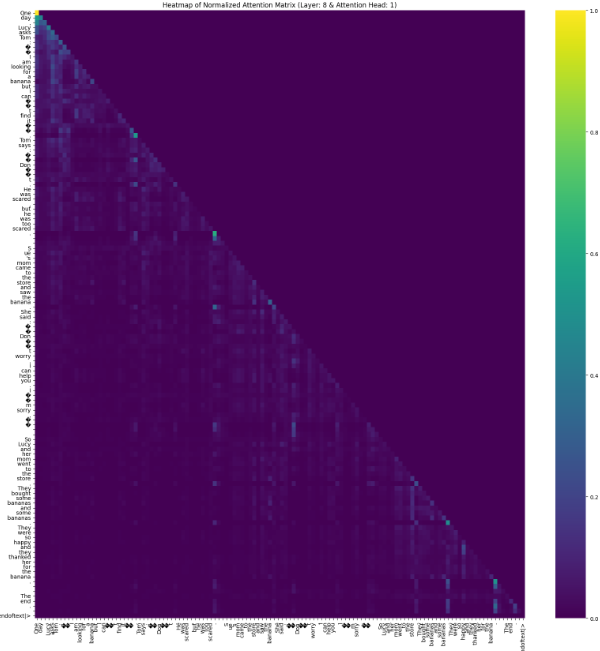

2. Distance-Based Attention: Many heatmaps exhibit strong attention near the diagonal but fading as the distance increases between tokens. This pattern is consistent with the authors' observations and suggests that the model prioritizes local context, focusing more on adjacent or closely positioned words.Here we see distance based attention for head 4,5, 7 in layer 8
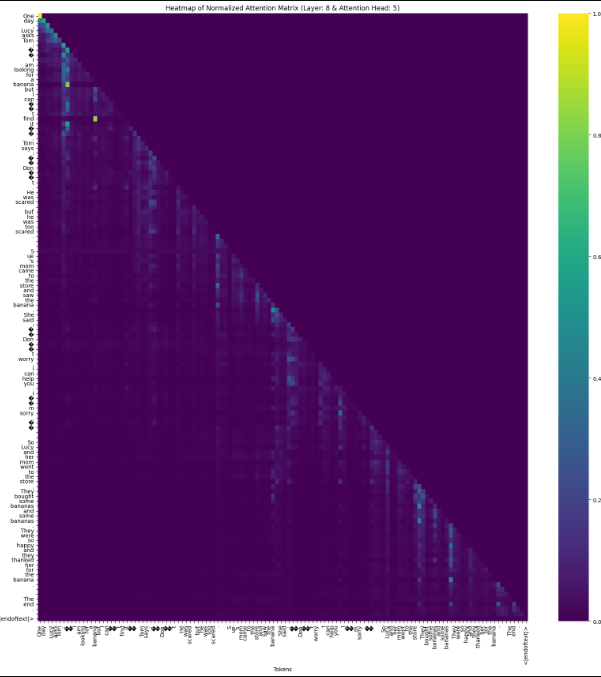


3. Semantic-Based Attention: There are instances where certain heatmaps highlight attention between non-adjacent tokens. This pattern, albeit less frequent, suggests the model's capability to establish relationships based on the context or meaning of the words, beyond just their positional proximity. These instances, though not as prominently observed as in the authors' report, indicate the model's nuanced understanding of language.Here we see semantic based attention for head 2,3( I -> ask , find -> banana), 11, 13 and 16 in layer 8
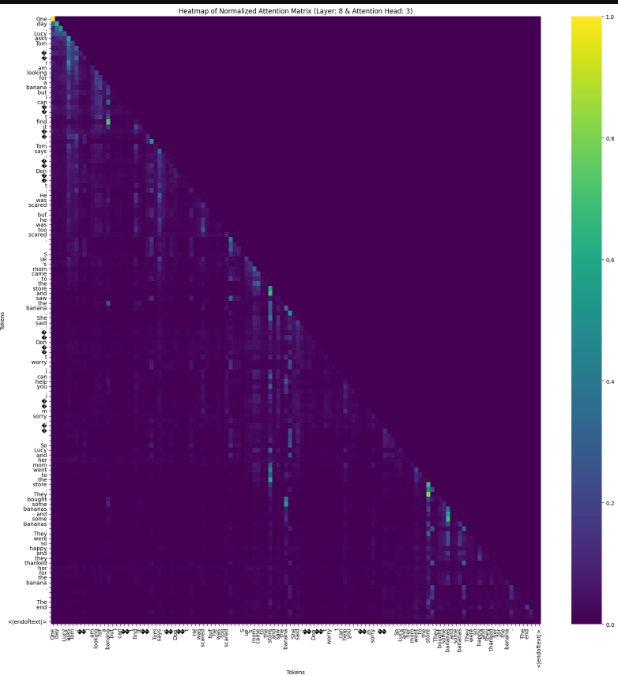

4. Other Patterns: Some heads show sparse attention patterns, where only a few tokens receive significant attention. This might indicate specialized roles for certain heads, like focusing on specific syntactic or semantic features, aligning with the multi-head attention concept where different heads capture different types of relationships. Other pattern can be seen in 6th head of layer 8.
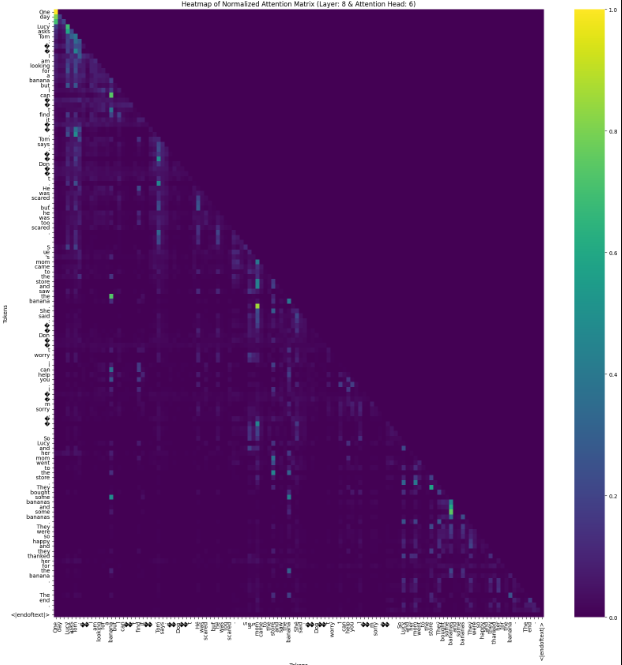
### Limitations of the Analysis
Eldan and Li acknowledge that their interpretability results are not exhaustive, and my analysis supports this view. Key limitations include:

1.  Complexity of Interpretation: Interpreting attention patterns is inherently complex. While heatmaps provide visual cues, deciphering these into concrete linguistic phenomena is challenging and often speculative. Moreover this analysis is largely qualitative.

2. Model's Internal Dynamics: Attention maps only provide a snapshot of the model's decision-making process. Understanding how these patterns translate to the model's final output requires deeper analysis, considering other factors like token embeddings and layer interactions.

3. Training Data Influence: The model's training on a specific dataset like TinyStories means its attention patterns are heavily influenced by this data. This raises questions about the generalizability of these patterns to other types of text or tasks.

4. Role of Individual Heads: While some heads show clear patterns (like self or distance-based attention), the specific role or contribution of each head is not always apparent. This obscurity limits the depth of our understanding of how different components of the model contribute to the overall task.


